In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler  # type: ignore
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# file path
train_file_path = "train_dataset.csv"
test_file_path = "test_dataset.csv"

train_fasttext_title_embeddings_path = "features_fasttext/train_fasttext_title_embeddings.npy"
train_doc2vec_features_genre_path = "features_doc2vec/train_doc2vec_features_genre.npy"
train_doc2vec_features_plot_keywords_path = "features_doc2vec/train_doc2vec_features_plot_keywords.npy"
train_countvec_actor_1_name_path = "features_countvec/train_countvec_features_actor_1_name.npy"
train_countvec_actor_2_name_path = "features_countvec/train_countvec_features_actor_2_name.npy"
train_countvec_director_name_path = "features_countvec/train_countvec_features_director_name.npy"

test_fasttext_title_embeddings_path = "features_fasttext/test_fasttext_title_embeddings.npy"
test_doc2vec_features_genre_path = "features_doc2vec/test_doc2vec_features_genre.npy"
test_doc2vec_features_plot_keywords_path = "features_doc2vec/test_doc2vec_features_plot_keywords.npy"
test_countvec_actor_1_name_path = "features_countvec/test_countvec_features_actor_1_name.npy"
test_countvec_actor_2_name_path = "features_countvec/test_countvec_features_actor_2_name.npy"
test_countvec_director_name_path = "features_countvec/test_countvec_features_director_name.npy"

label_column = "imdb_score_binned"


# read and split file
train_data = pd.read_csv(train_file_path)
X_test= pd.read_csv(test_file_path)

train_fasttext_title_embeddings = pd.DataFrame(np.load(train_fasttext_title_embeddings_path))
train_doc2vec_features_genre =  pd.DataFrame(np.load(train_doc2vec_features_genre_path))
train_doc2vec_features_plot_keywords = pd.DataFrame(np.load(train_doc2vec_features_plot_keywords_path))
train_countvec_actor_1_name = pd.DataFrame(np.load(train_countvec_actor_1_name_path))
train_countvec_actor_2_name = pd.DataFrame(np.load(train_countvec_actor_2_name_path))
train_countvec_director_name = pd.DataFrame(np.load(train_countvec_director_name_path))

test_fasttext_title_embeddings = pd.DataFrame(np.load(test_fasttext_title_embeddings_path))
test_doc2vec_features_genre =  pd.DataFrame(np.load(test_doc2vec_features_genre_path))
test_doc2vec_features_plot_keywords = pd.DataFrame(np.load(test_doc2vec_features_plot_keywords_path))
test_countvec_actor_1_name = pd.DataFrame(np.load(test_countvec_actor_1_name_path))
test_countvec_actor_2_name = pd.DataFrame(np.load(test_countvec_actor_2_name_path))
test_countvec_director_name = pd.DataFrame(np.load(test_countvec_director_name_path))

## 1. Data Exploration

In [4]:
train_size = train_data.shape[0]
test_size = X_test.shape[0]
total = train_size + test_size
train_data_ratio = round(train_size / total, 2)
X_test_ratio = round(test_size / total, 2)

print("Shape of train_data:", train_data.shape)
print("Shape of X_test:", X_test.shape)
print("train_data ratio :  X_test ratio:", train_data_ratio, " : ", X_test_ratio)

train_data.head()

Shape of train_data: (3004, 27)
Shape of X_test: (752, 26)
train_data ratio :  X_test ratio: 0.8  :  0.2


id       director_name  num_critic_for_reviews  duration  \
0   1        Roger Allers                     186        73   
1   2    George A. Romero                     252        97   
2   3  David Gordon Green                     232       117   
3   4      John Carpenter                     297       109   
4   5       Peter Jackson                     297       171   

   director_facebook_likes  actor_3_facebook_likes   actor_2_name  \
0                       28                     847    Nathan Lane   
1                        0                     233  Shawn Roberts   
2                      234                     221   Tye Sheridan   
3                        0                     145  Richard Masur   
4                        0                     857  Orlando Bloom   

   actor_1_facebook_likes      gross  \
0                    2000  422783777   
1                     654   20433940   
2                   12000     371897   
3                     957   13782838   
4                   16000  313837577   

                                     genres  ... num_user_for_reviews  \
0  Adventure|Animation|Drama|Family|Musical  ...                  656   
1                                    Horror  ...                  662   
2                                     Drama  ...                  118   
3                     Horror|Mystery|Sci-Fi  ...                  911   
4            Action|Adventure|Drama|Fantasy  ...                 5060   

  language      country  content_rating title_year  actor_2_facebook_likes  \
0  English          USA               G       1994                     886   
1  English       Canada               R       2005                     529   
2  English          USA               R       2013                    1000   
3  English          USA               R       1982                     163   
4  English  New Zealand           PG-13       2001                    5000   

  movie_facebook_likes                                    title_embedding  \
0                17000  [-4.1984697e-03  4.2941985e-03 -1.1961063e-03 ...   
1                    0  [-4.7586653e-03  2.6511205e-03 -3.7954253e-04 ...   
2                11000  [ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...   
3                23000  [-5.32674184e-03  3.60742491e-03  7.91795843e-...   
4                21000  [-4.2586620e-03  3.6257182e-03 -1.5326265e-03 ...   

  average_degree_centrality imdb_score_binned  
0                  0.001576                 4  
1                  0.000675                 2  
2                  0.003002                 2  
3                  0.001726                 4  
4                  0.001876                 4  

[5 rows x 27 columns]

2    0.612184
3    0.258655
1    0.078229
4    0.042943
0    0.007989
Name: imdb_score_binned, dtype: float64


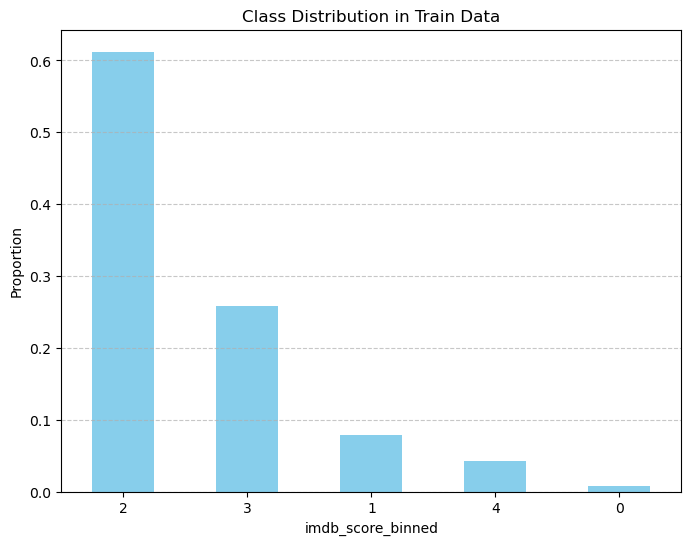

In [5]:
class_distribution = train_data[label_column].value_counts(normalize=True) 
print(class_distribution)
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('imdb_score_binned')
plt.ylabel('Proportion')
plt.title('Class Distribution in Train Data')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3004 non-null   int64  
 1   director_name              3004 non-null   object 
 2   num_critic_for_reviews     3004 non-null   int64  
 3   duration                   3004 non-null   int64  
 4   director_facebook_likes    3004 non-null   int64  
 5   actor_3_facebook_likes     3004 non-null   int64  
 6   actor_2_name               3004 non-null   object 
 7   actor_1_facebook_likes     3004 non-null   int64  
 8   gross                      3004 non-null   int64  
 9   genres                     3004 non-null   object 
 10  actor_1_name               3004 non-null   object 
 11  movie_title                3004 non-null   object 
 12  num_voted_users            3004 non-null   int64  
 13  cast_total_facebook_likes  3004 non-null   int64

In [7]:
text_data = ['director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 
                'actor_3_name', 'title_embedding', 'plot_keywords']

categorical_data = ['country', 'language', 'content_rating', 'genre']

numeric_data = ['id', 'num_critic_for_reviews', 'duration', 'director_facebook_likes',
                   'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 
                   'num_voted_users','cast_total_facebook_likes', 'facenumber_in_poster', 
                   'num_user_for_reviews', 'actor_2_facebook_likes', 'movie_facebook_likes',
                   'average_degree_centrality', 'title_year']

## 2. Data Preprocessing
### 2.1 Numerical Data Information and Preprocess

In [8]:
def plot_feature_distribution(data,feature):
    plt.figure(figsize=(10, 6))  
    data[feature].hist(bins=30) 
    plt.title('Distribution of', feature)  
    plt.xlabel(feature)  
    plt.ylabel('Frequency') 
    plt.show()

In [9]:
def plot_features_distribution(data,columns):
    data[columns].hist(bins=30, figsize=(20,15))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

In [10]:
def plot_boxplot(data, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.grid(True, linestyle='--', alpha=0.6) 
    plt.show()

In [11]:
def plot_feature_distribution_and_boxplot(data, feature):

    plt.figure(figsize=(12, 10)) 
    
    # bar
    plt.subplot(1, 2, 1) 
    data[feature].hist(bins=30)
    plt.title(f'Distribution of {feature}') 
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # boxplot
    plt.subplot(1, 2, 2) 
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}') 
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout(pad=3.0)  
    plt.show()

In [12]:
def log_transform(data, features):
    for feature in features:
        data.loc[:, feature] = data.loc[:, feature].apply(np.log1p)
    return data

In [13]:
def remove_outliers(data, features):
    data_clean = data.copy()  
    for feature in features:
        Q1 = data_clean[feature].quantile(0.25)
        Q3 = data_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        
        data_clean = data_clean[(data_clean[feature] >= lower_bound) & (data_clean[feature] <= upper_bound)]
    
    return data_clean

In [14]:
def plot_heatmap(data, columns, label=None):
    if label:
        cols_with_label = columns + [label]
        corr_matrix = data[cols_with_label].corr()
    else:
        corr_matrix = data[columns].corr()
        
    plt.figure(figsize=(12, 10))
    heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title('Heatmap of Feature Correlations')
    plt.show()

In [15]:
def normalize_standardization_attributes(X_train, X_test):
    normalized_X_train = (X_train - X_train.mean())/(X_train.std())
    normalized_X_test = (X_test - X_train.mean())/(X_train.std())
    return normalized_X_train, normalized_X_test

In [16]:
def normalize_min_max_scaling(X_train, X_test):
    normalized_X_train = (X_train - X_train.min())/(X_train.max() - X_train.min())
    normalized_X_test = (X_test - X_train.min())/(X_train.max() - X_train.min())
    return normalized_X_train, normalized_X_test

In [17]:
def normalized(X_train, X_test, features, method = "Standardlization"):
    normalized_X_train, normalized_X_test = X_train.copy(), X_test.copy()
    
    if method == "Standardlization":
        normal_X_train, normal_X_test = normalize_standardization_attributes(X_train[features], X_test[features])
    elif method == "MinMax":
        normal_X_train, normal_X_test = normalize_min_max_scaling(X_train[features], X_test[features])
    else:
        pass

    normalized_X_train[features] = normal_X_train
    normalized_X_test[features] = normal_X_test

    return normalized_X_train, normalized_X_test

In [18]:
def plot_distributions(data,columns):
    data[columns].hist(bins=30, figsize=(20,15))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

In [19]:
train_data = train_data.drop('id', axis = 1)
numeric_data.remove('id')
train_data[numeric_data].describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             3004.000000  3004.000000              3004.000000   
mean               165.609188   110.076565               778.890146   
std                121.254549    21.910608              2990.741946   
min                  2.000000    37.000000                 0.000000   
25%                 76.000000    96.000000                10.000000   
50%                137.000000   106.000000                62.500000   
75%                223.000000   120.000000               234.000000   
max                813.000000   330.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             3004.000000             3004.000000  3.004000e+03   
mean               767.860186             7654.935752  5.187733e+07   
std               1901.991202            16488.761947  6.840156e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                191.000000              728.500000  8.579684e+06   
50%                433.000000             1000.000000  3.020586e+07   
75%                683.000000            12000.000000  6.647359e+07   
max              23000.000000           640000.000000  6.586723e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     3.004000e+03                3004.000000           3004.000000   
mean      1.049017e+05               11391.643808              1.380826   
std       1.508573e+05               20044.723195              2.093417   
min       9.100000e+01                   0.000000              0.000000   
25%       1.897825e+04                1873.000000              0.000000   
50%       5.387400e+04                3889.000000              1.000000   
75%       1.284895e+05               15925.250000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews  actor_2_facebook_likes  movie_facebook_likes  \
count           3004.000000             3004.000000           3004.000000   
mean             335.922770             1992.843209           8972.179427   
std              415.219466             4651.072554          19853.888300   
min                4.000000                0.000000              0.000000   
25%              108.000000              377.750000              0.000000   
50%              208.000000              664.000000            241.000000   
75%              398.000000              970.000000          11000.000000   
max             5060.000000           137000.000000         197000.000000   

       average_degree_centrality   title_year  
count                3004.000000  3004.000000  
mean                    0.001739  2002.782956  
std                     0.001183    10.086250  
min                     0.000300  1929.000000  
25%                     0.000825  1999.000000  
50%                     0.001426  2004.000000  
75%                     0.002401  2010.000000  
max                     0.007354  2016.000000

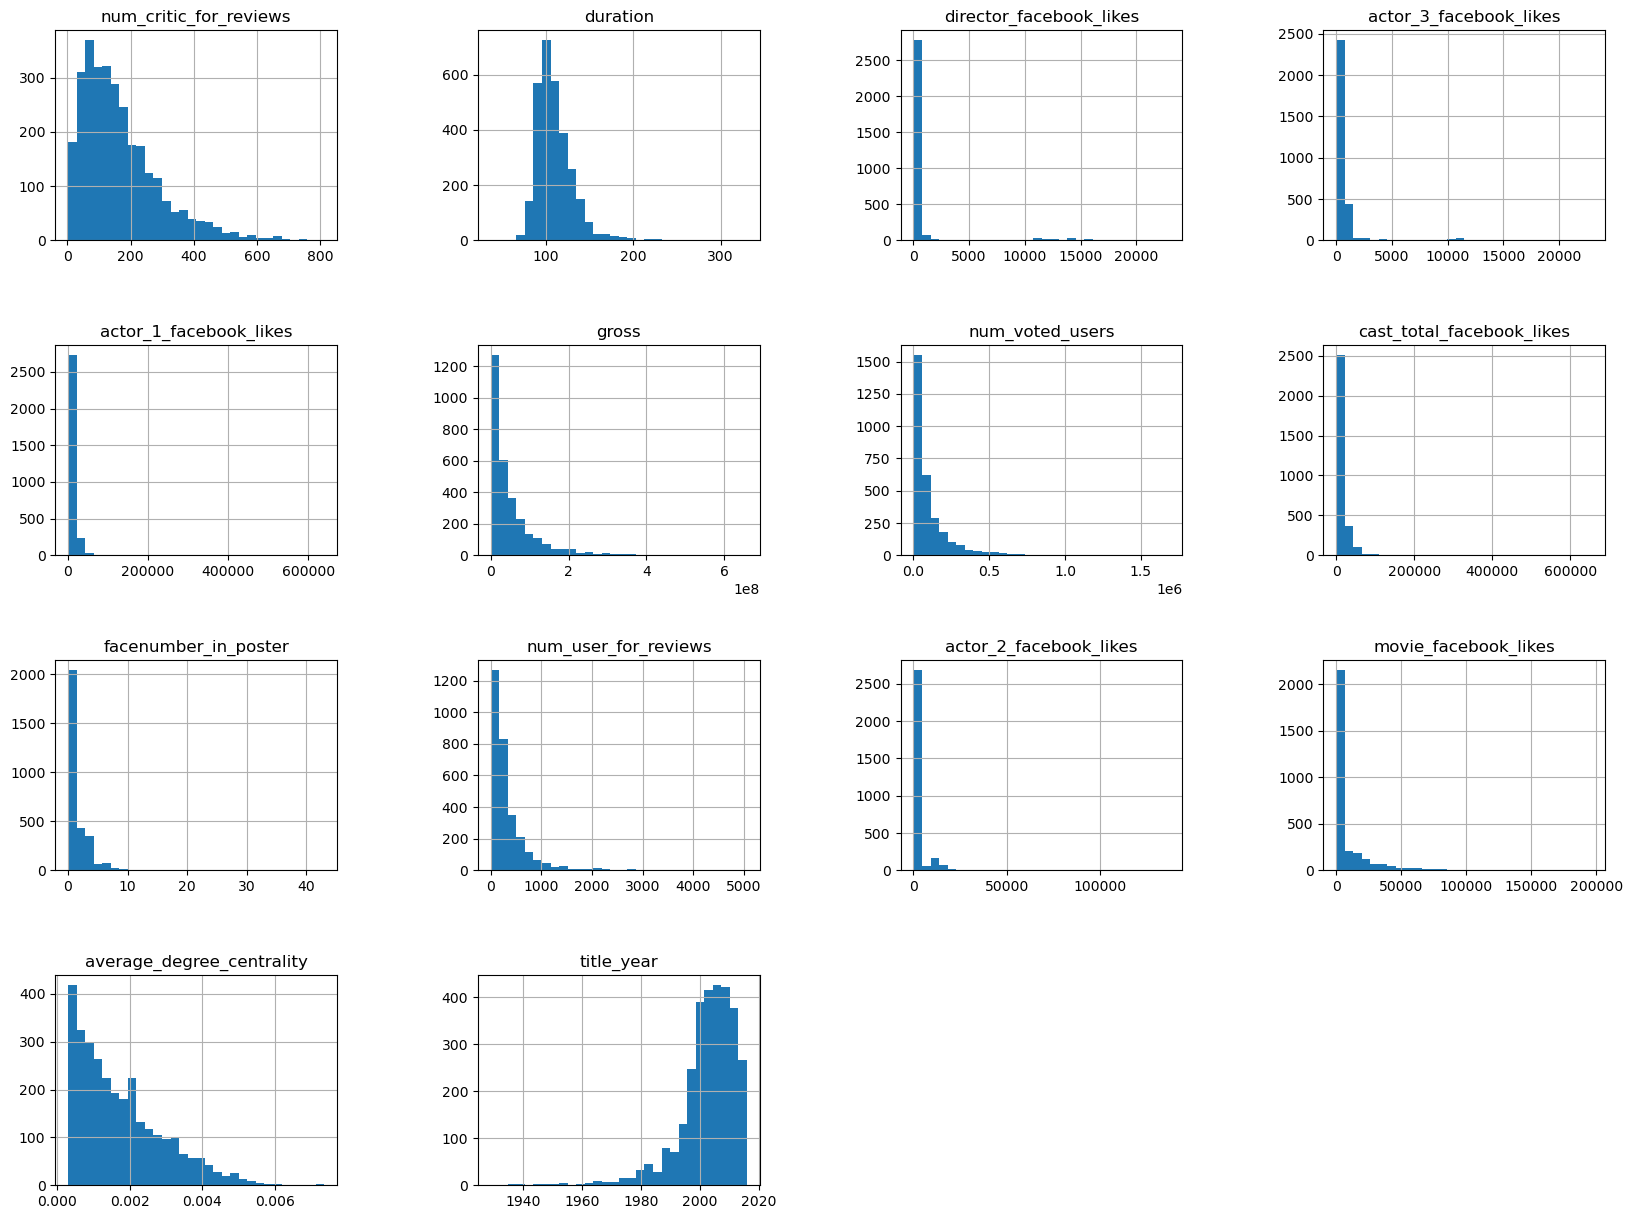

In [20]:
plot_distributions(train_data,numeric_data)

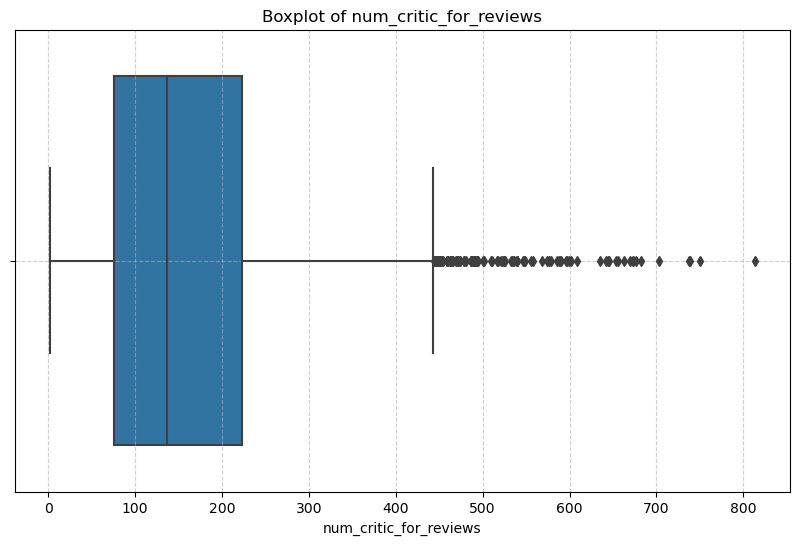

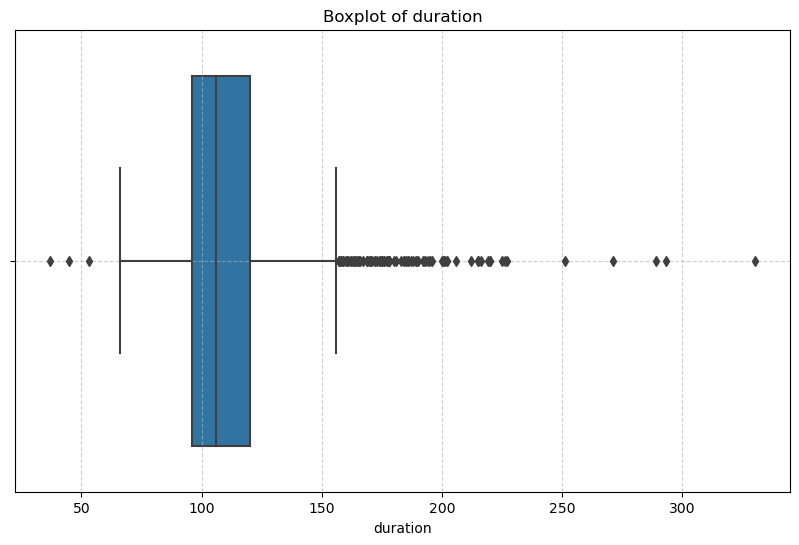

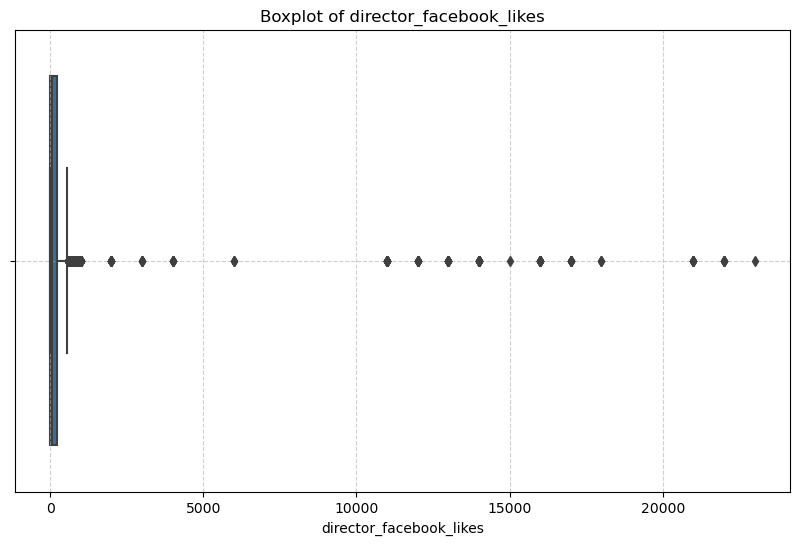

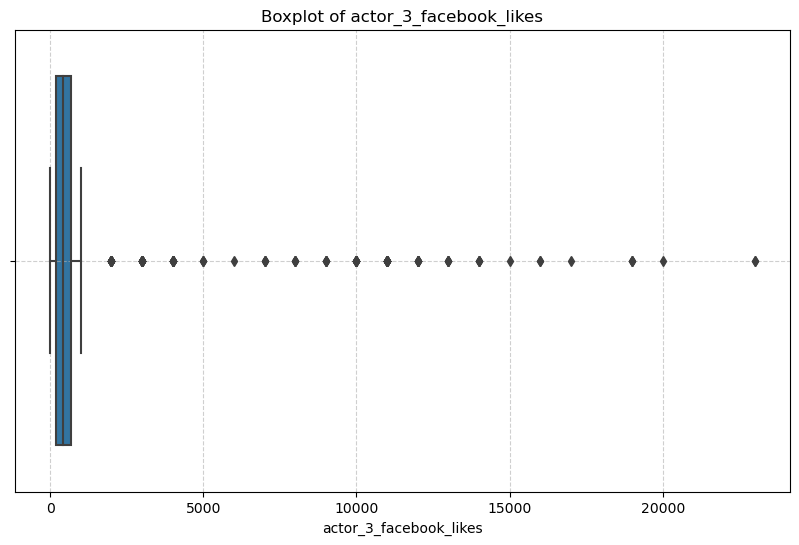

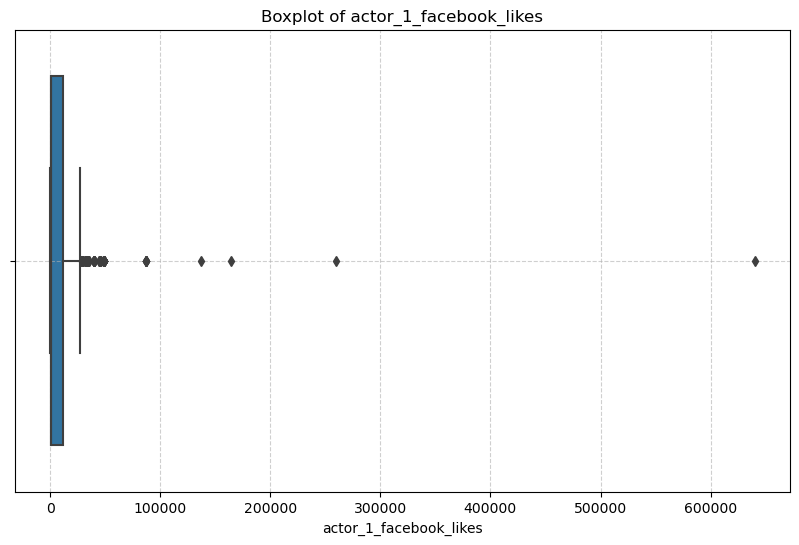

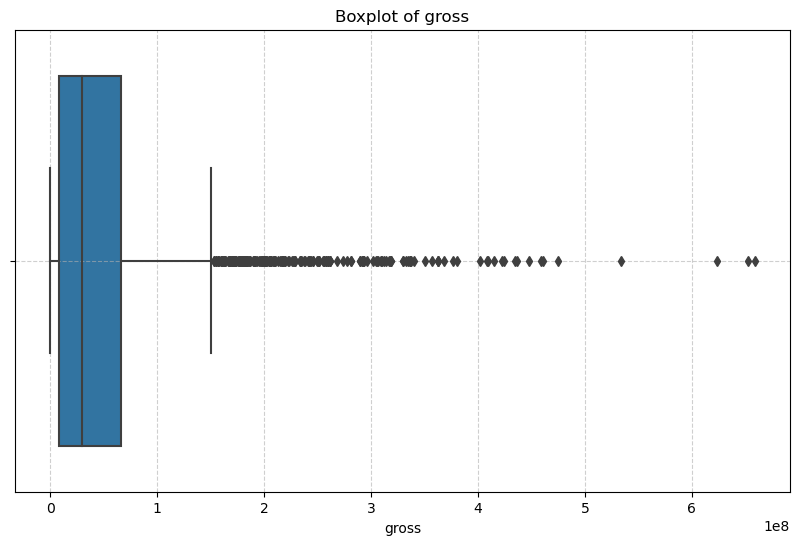

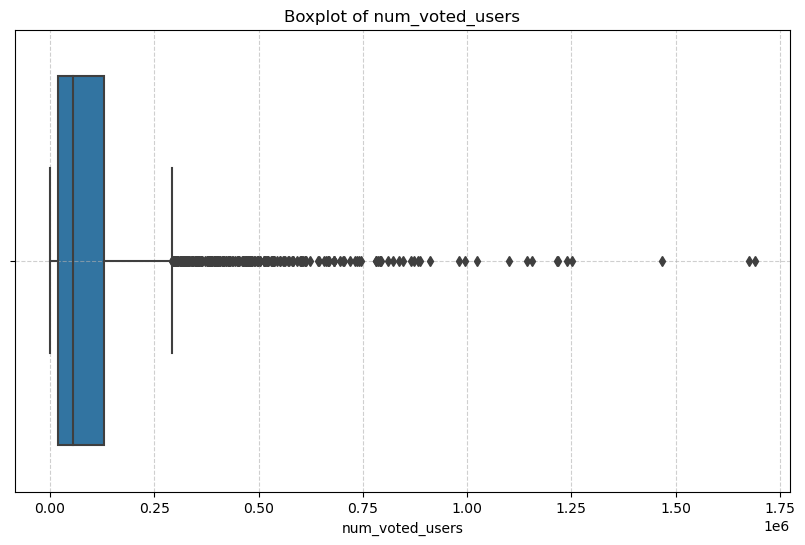

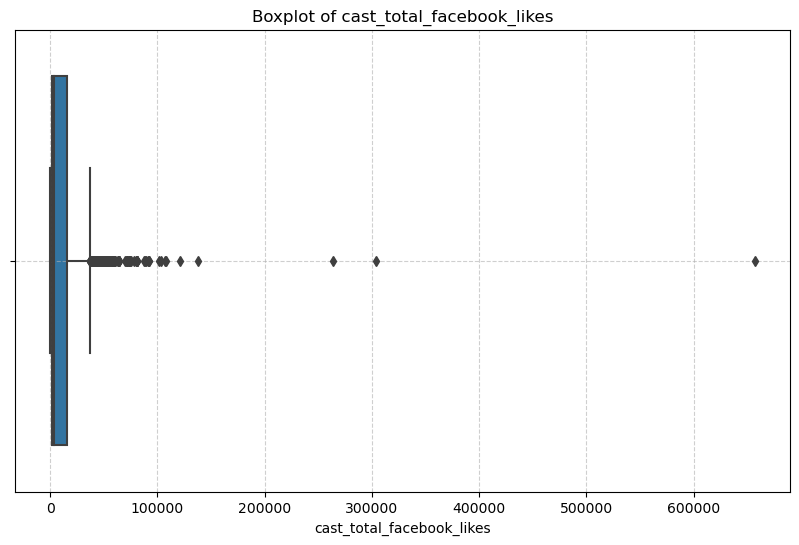

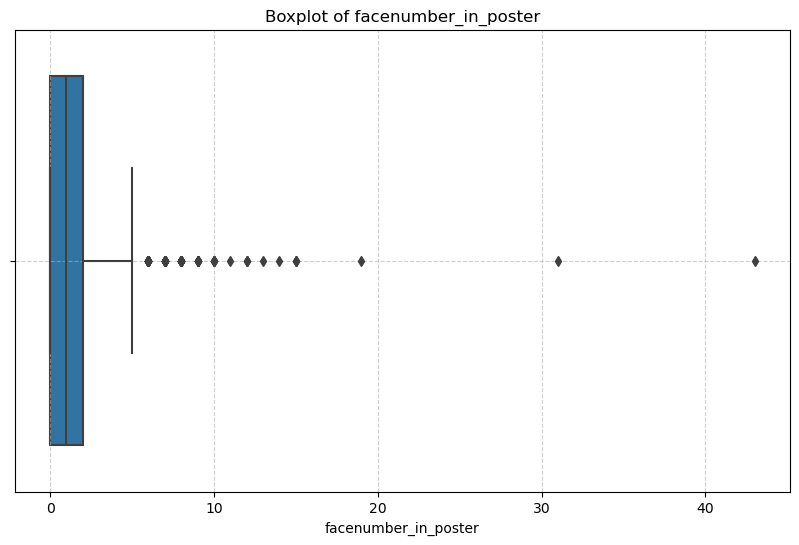

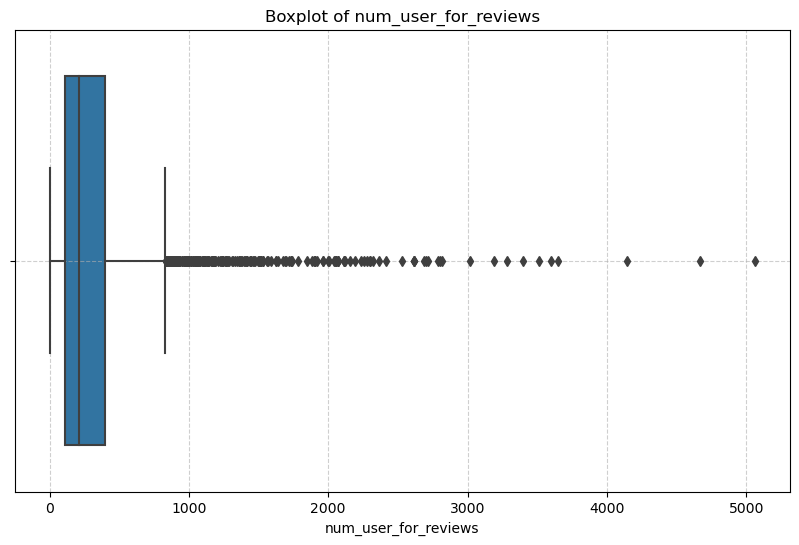

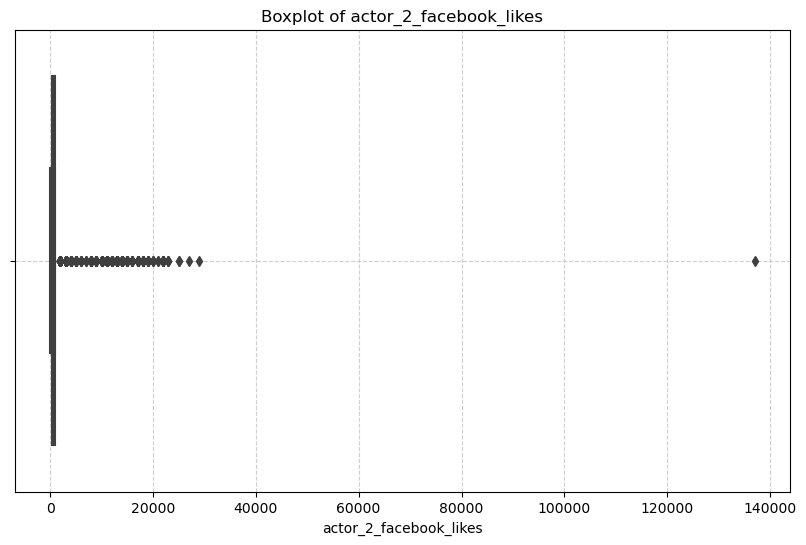

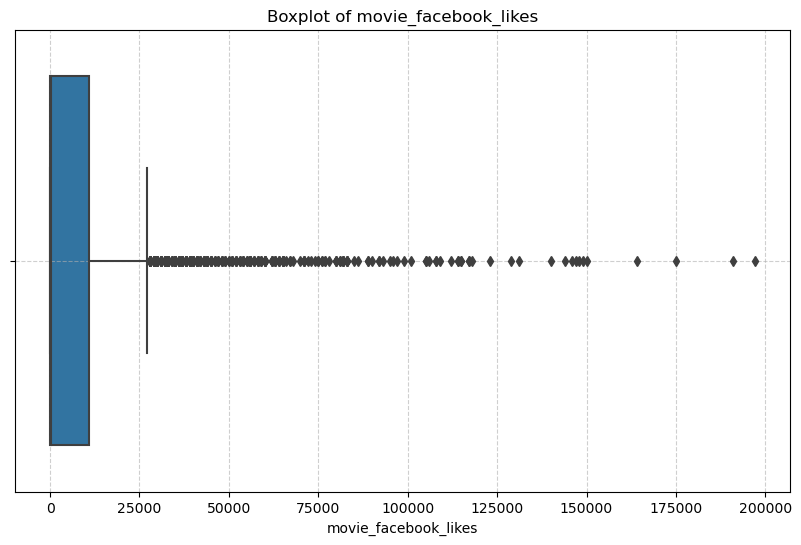

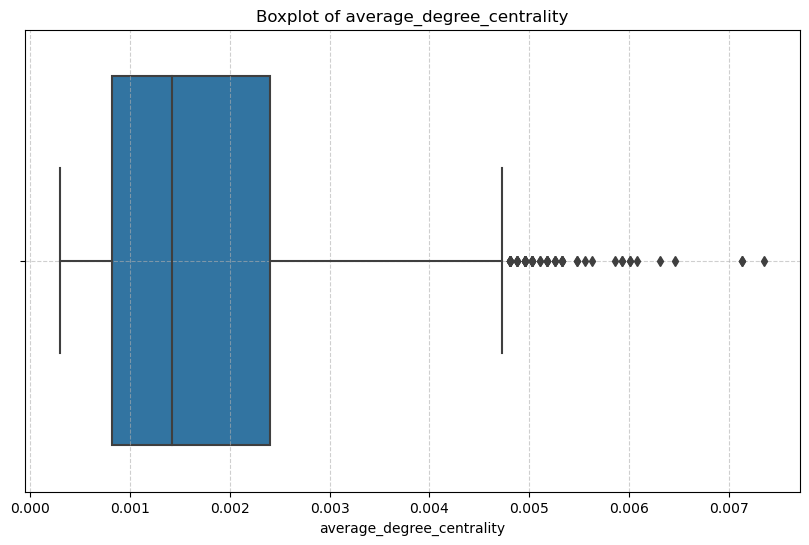

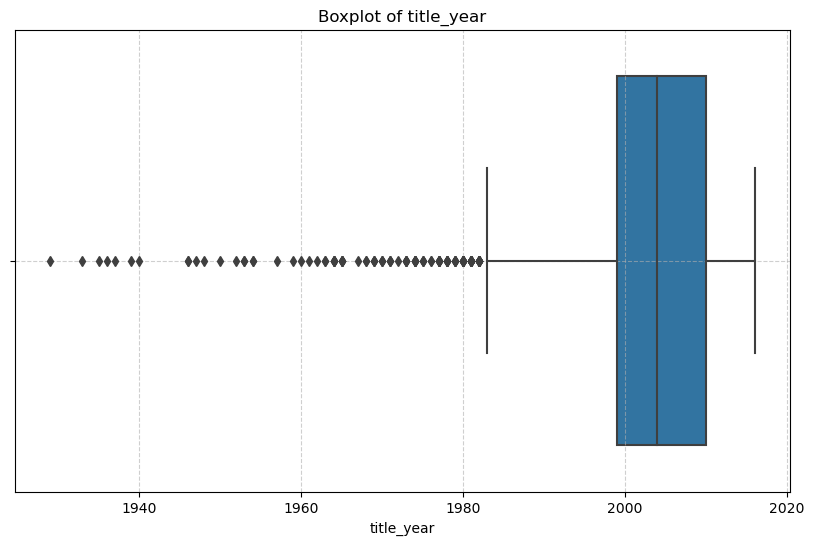

In [21]:
for feature in numeric_data:
    plot_boxplot(train_data, feature)

In [22]:
train_data_21 = log_transform(train_data, numeric_data)
X_test_21 = log_transform(X_test, numeric_data)
train_data_21 = remove_outliers(train_data_21, numeric_data)
train_data_21, X_test_21 = normalized(train_data_21, X_test_21, numeric_data, method = "Standardlization")

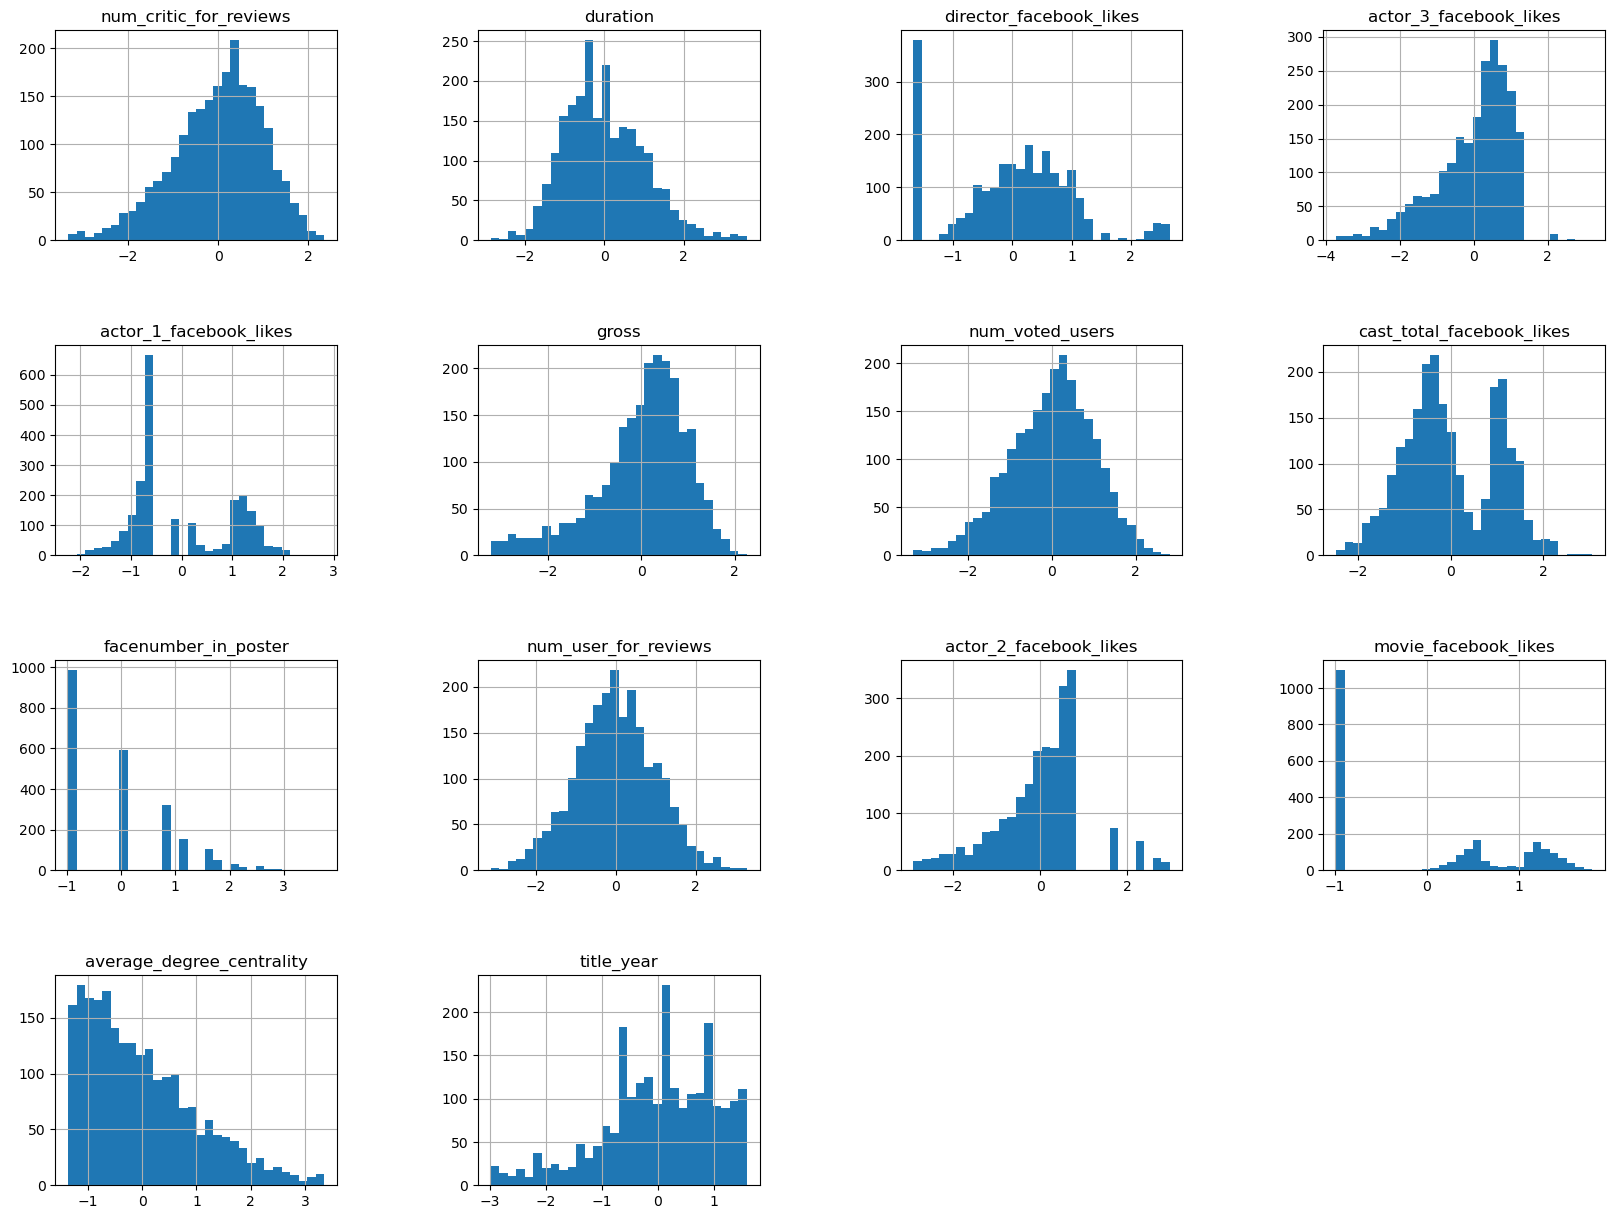

In [23]:
plot_distributions(train_data_21,numeric_data)

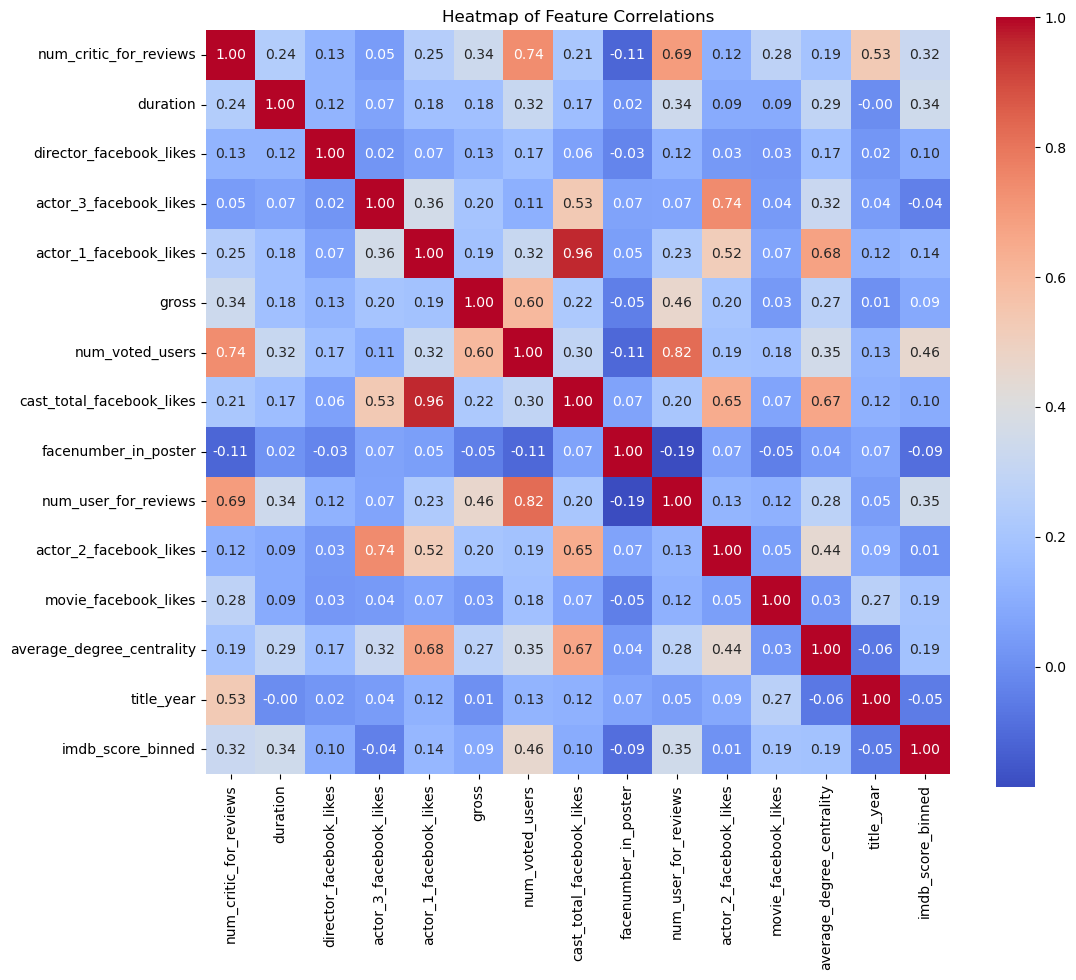

In [24]:
plot_heatmap(train_data_21, numeric_data, label_column)

In [25]:
train_data_21 = train_data_21.drop(['actor_1_facebook_likes', 
                            'actor_2_facebook_likes',
                            'actor_3_facebook_likes',
                            'cast_total_facebook_likes',
                            'num_critic_for_reviews',
                            'facenumber_in_poster',
                            'num_user_for_reviews'
                            ], axis = 1)

X_test_21 = X_test_21.drop(['actor_1_facebook_likes', 
                            'actor_2_facebook_likes',
                            'actor_3_facebook_likes',
                            'cast_total_facebook_likes',
                            'num_critic_for_reviews',
                            'facenumber_in_poster',
                            'num_user_for_reviews'
                            ], axis = 1)

numeric_data = [feature for feature in numeric_data if feature not in 
                ['actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes', 
                 'cast_total_facebook_likes', 'num_critic_for_reviews', 'facenumber_in_poster', 'num_user_for_reviews']]

In [26]:
lost_data_count = train_data.shape[0] - train_data_21.shape[0]
lost_data_percentage = (lost_data_count / train_data.shape[0]) * 100
print(f"A total of {lost_data_count} rows of data were lost, which represents {lost_data_percentage:.2f}% of the original data.")

A total of 713 rows of data were lost, which represents 23.74% of the original data.


### 2.2 Categorical Data Information and Preprocess

In [27]:
def calculate_category_proportions(df, feature):
    country_category_proportions = df[feature].value_counts(normalize=True)
    return country_category_proportions
    

In [28]:
def plot_category_feature(data, feature, label):

    data_4 = data[data[label] == 4][feature].value_counts().sort_index()
    data_0 = data[data[label] == 0][feature].value_counts().sort_index()
    feature_counts = data[feature].value_counts(normalize=True)

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 3, 1)
    data_4.plot(kind='bar', color='blue')
    plt.title(f'{feature} for Score 4')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.ylim(0, max(data_4.max(), data_0.max()) + 1)

    plt.subplot(1, 3, 2)
    data_0.plot(kind='bar', color='red')
    plt.title(f'{feature} for Score 0')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.ylim(0, max(data_4.max(), data_0.max()) + 1)

    plt.subplot(1, 3, 3)
    plt.pie(feature_counts, startangle=90)
    plt.title(f'Distribution of {feature}')
    plt.axis('equal')

    plt.tight_layout()
    plt.show()

In [29]:
def plot_stacked_bar(df, feature, label, legend):
    ct = pd.crosstab(df[label], df[feature])
    ct_percentage = ct.div(ct.sum(axis=1), axis=0)

    ax = ct_percentage.plot(kind='bar', stacked=True, colormap='viridis')
    plt.xlabel(label)
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {label} by {feature}')
    if not legend:
        ax.get_legend().remove()
    else:
        ax.legend(title=feature, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    return ct_percentage

In [30]:
def encode_categorical_column(feature_series):
   encoder = OneHotEncoder(sparse=False)
   encoded_data = encoder.fit_transform(feature_series.values.reshape(-1, 1))
   feature_names = encoder.get_feature_names_out([feature_series.name])
   encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=feature_series.index)
   
   return encoded_df

In [31]:
def multivalue_categorical_column(feature_series):
    multivalue_list = feature_series.str.split('|').tolist()
    mlb = MultiLabelBinarizer()
    encoded_data = mlb.fit_transform(multivalue_list)
    encoded_df = pd.DataFrame(encoded_data, columns=mlb.classes_, index=feature_series.index)
    return encoded_df

In [32]:
def convert_category_to_numbers(feature_series, feature):
    encoder = LabelEncoder()
    encoded_data = encoder.fit_transform(feature_series)
    encoded_series = pd.DataFrame(encoded_data, index=feature_series.index, columns = [feature])
    return encoded_series

In [33]:
def simplify_categorical_feature(feature_series, feature):
   
   most_frequent_category = feature_series.value_counts().idxmax()
   non_feature = "Non-" + most_frequent_category
   simplified_feature = feature_series.apply(lambda x: x if x == most_frequent_category else non_feature)
   simplified_feature = pd.DataFrame(simplified_feature, index=feature_series.index, columns = [feature])
   return simplified_feature

In [34]:
def align_train_test_columns(train_df, test_df):
    train_cols = set(train_df.columns)
    test_cols = set(test_df.columns)
    missing_in_test = train_cols - test_cols
    missing_in_train = test_cols - train_cols
    
    for col in missing_in_test:
        test_df[col] = 0
    
    for col in missing_in_train:
        train_df[col] = 0
    
    test_df = test_df[train_df.columns]
    
    return train_df, test_df

In [35]:
def concat_category_data(df, new_df):

    concat_df = pd.concat([new_df, df], axis=1)
    concat_columns = new_df.columns.tolist() + numeric_data
    plot_heatmap(concat_df, concat_columns, label_column)
    return concat_df

#### 2.2.1  country

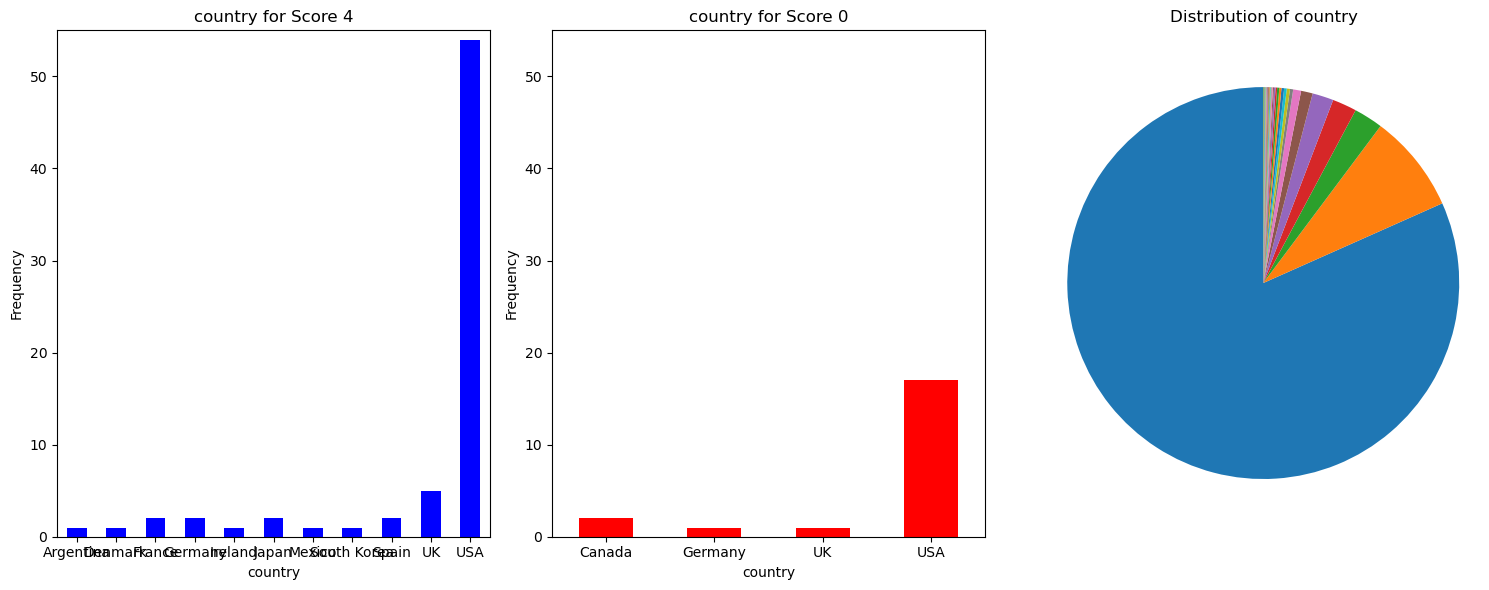

In [36]:
plot_category_feature(train_data_21, 'country', label_column)

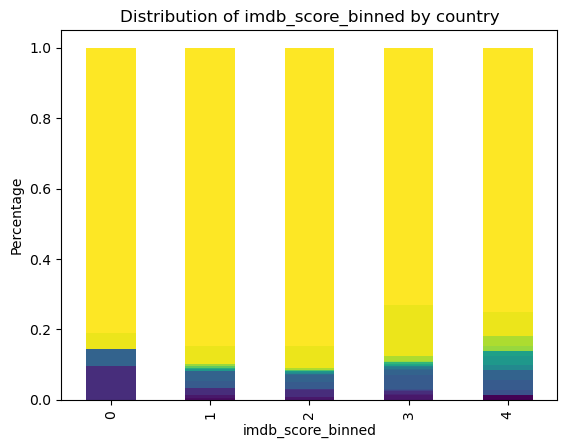

country            Argentina     Aruba  Australia   Belgium    Canada  \
imdb_score_binned                                                       
0                   0.000000  0.000000   0.000000  0.000000  0.095238   
1                   0.000000  0.004785   0.009569  0.000000  0.019139   
2                   0.000000  0.000000   0.008844  0.000000  0.019728   
3                   0.000000  0.000000   0.013487  0.001927  0.009634   
4                   0.013889  0.000000   0.000000  0.000000  0.000000   

country              Chile     China  Czech Republic   Denmark    France  ...  \
imdb_score_binned                                                         ...   
0                  0.00000  0.000000         0.00000  0.000000  0.000000  ...   
1                  0.00000  0.000000         0.00000  0.000000  0.019139  ...   
2                  0.00068  0.000680         0.00068  0.000680  0.019728  ...   
3                  0.00000  0.001927         0.00000  0.003854  0.038536  ...   
4                  0.00000  0.000000         0.00000  0.013889  0.027778  ...   

country             Poland   Romania   Russia  South Africa  South Korea  \
imdb_score_binned                                                          
0                  0.00000  0.000000  0.00000      0.000000     0.000000   
1                  0.00000  0.004785  0.00000      0.000000     0.004785   
2                  0.00068  0.000000  0.00068      0.000000     0.001361   
3                  0.00000  0.000000  0.00000      0.001927     0.001927   
4                  0.00000  0.000000  0.00000      0.000000     0.013889   

country               Spain   Taiwan  Thailand        UK       USA  
imdb_score_binned                                                   
0                  0.000000  0.00000  0.000000  0.047619  0.809524  
1                  0.000000  0.00000  0.000000  0.052632  0.846890  
2                  0.004082  0.00068  0.000000  0.063946  0.846259  
3                  0.013487  0.00000  0.001927  0.144509  0.730250  
4                  0.027778  0.00000  0.000000  0.069444  0.750000  

[5 rows x 33 columns]

In [37]:
plot_stacked_bar(train_data_21, 'country', label_column, legend = False)

In [38]:
calculate_category_proportions(train_data_21, 'country').head()

USA        0.816674
UK         0.081187
France     0.024007
Germany    0.020079
Canada     0.017460
Name: country, dtype: float64

In [39]:
simplified_train_country = simplify_categorical_feature(train_data_21['country'], 'country')
simplified_convert_category_to_numbers_country = convert_category_to_numbers(simplified_train_country, 'country')

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
test_simplified_country = simplify_categorical_feature(X_test_21['country'], 'country')
test_simplified_convert_category_to_numbers_country = convert_category_to_numbers(test_simplified_country, 'country')

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 2.2.2  language

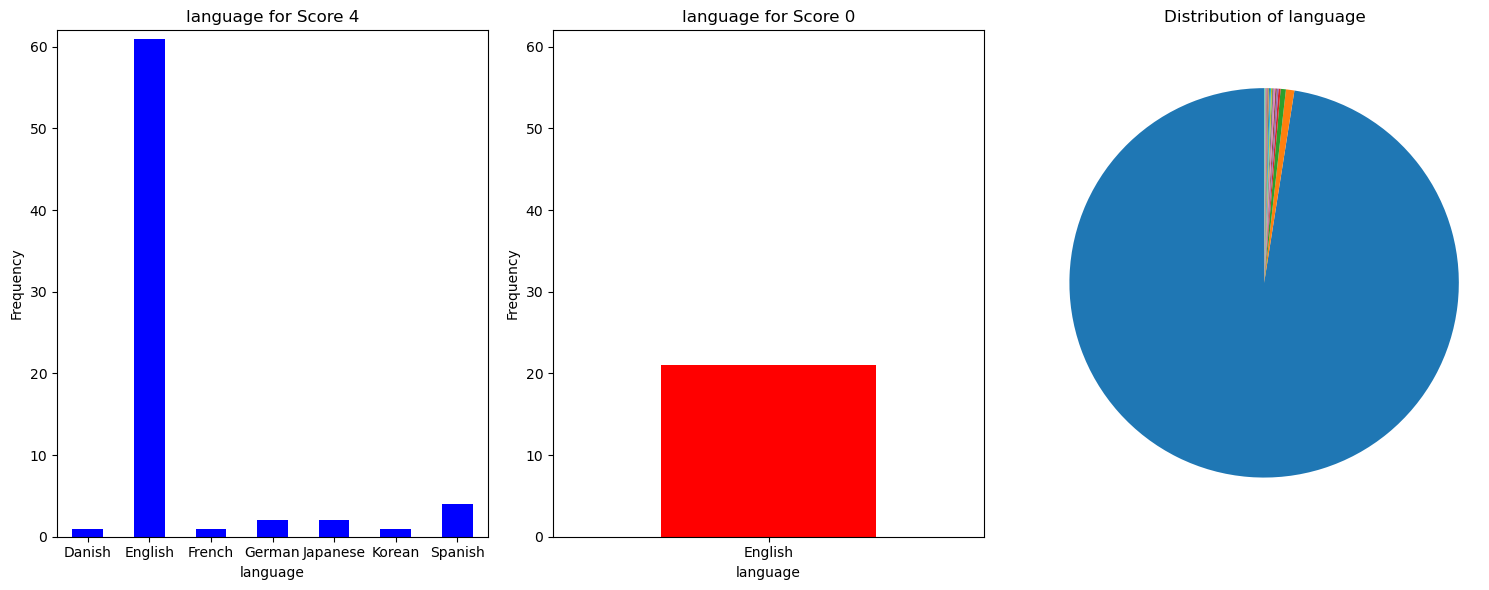

In [41]:
plot_category_feature(train_data_21, 'language', label_column)

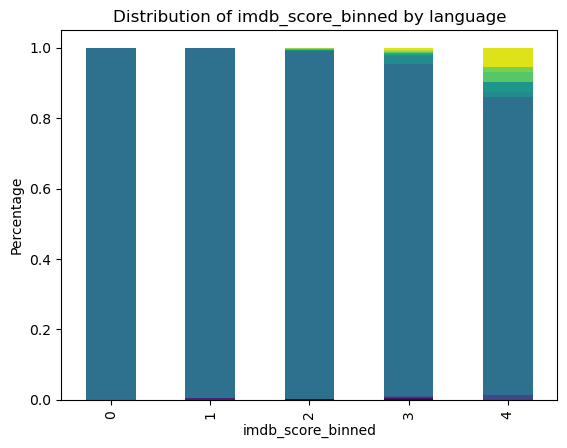

language           Aboriginal   Aramaic   Bosnian  Cantonese    Danish  \
imdb_score_binned                                                        
0                    0.000000  0.000000  0.000000   0.000000  0.000000   
1                    0.000000  0.000000  0.004785   0.000000  0.000000   
2                    0.000680  0.000000  0.000000   0.000680  0.000000   
3                    0.001927  0.001927  0.000000   0.003854  0.000000   
4                    0.000000  0.000000  0.000000   0.000000  0.013889   

language               Dari     Dutch   English  Filipino    French    German  \
imdb_score_binned                                                               
0                  0.000000  0.000000  1.000000   0.00000  0.000000  0.000000   
1                  0.000000  0.000000  0.995215   0.00000  0.000000  0.000000   
2                  0.000000  0.000000  0.989796   0.00068  0.002041  0.000000   
3                  0.001927  0.001927  0.942197   0.00000  0.023121  0.001927   
4                  0.000000  0.000000  0.847222   0.00000  0.013889  0.027778   

language              Hindi  Indonesian   Italian  Japanese    Korean  \
imdb_score_binned                                                       
0                  0.000000    0.000000  0.000000  0.000000  0.000000   
1                  0.000000    0.000000  0.000000  0.000000  0.000000   
2                  0.000000    0.000000  0.001361  0.000680  0.000680   
3                  0.003854    0.001927  0.000000  0.001927  0.001927   
4                  0.000000    0.000000  0.000000  0.027778  0.013889   

language           Mandarin      Maya   Spanish      Thai  
imdb_score_binned                                          
0                  0.000000  0.000000  0.000000  0.000000  
1                  0.000000  0.000000  0.000000  0.000000  
2                  0.001361  0.000000  0.002041  0.000000  
3                  0.001927  0.001927  0.005780  0.001927  
4                  0.000000  0.000000  0.055556  0.000000

In [42]:
plot_stacked_bar(train_data_21, 'language', label_column, legend = False)

In [43]:
calculate_category_proportions(train_data_21, 'language').head()

English     0.975120
French      0.006984
Spanish     0.004365
Japanese    0.001746
German      0.001309
Name: language, dtype: float64

In [44]:
simplified_train_language = simplify_categorical_feature(train_data_21['language'], 'language')
simplified_convert_category_to_numbers_language = convert_category_to_numbers(simplified_train_language, 'language')

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
test_simplified_language = simplify_categorical_feature(X_test_21['language'], 'language')
test_simplified_convert_category_to_numbers_language = convert_category_to_numbers(test_simplified_language, 'language')

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 2.2.3  content_rating

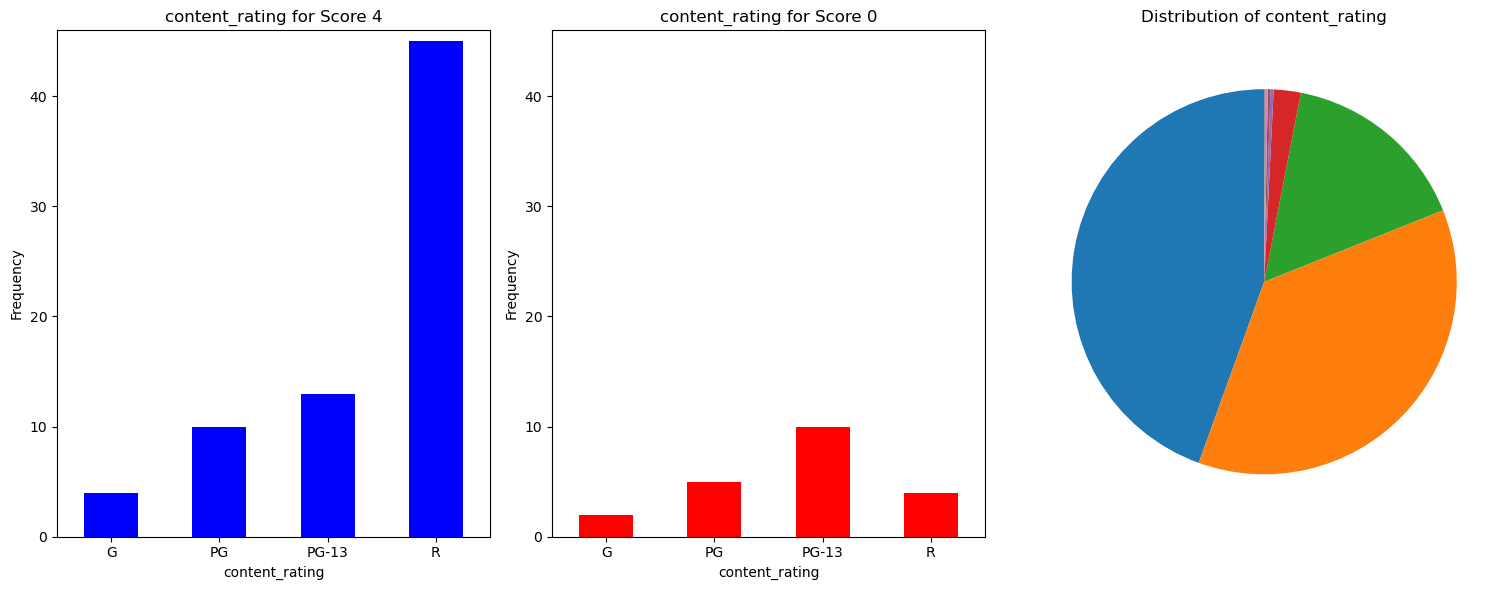

In [46]:
plot_category_feature(train_data_21, 'content_rating', label_column)

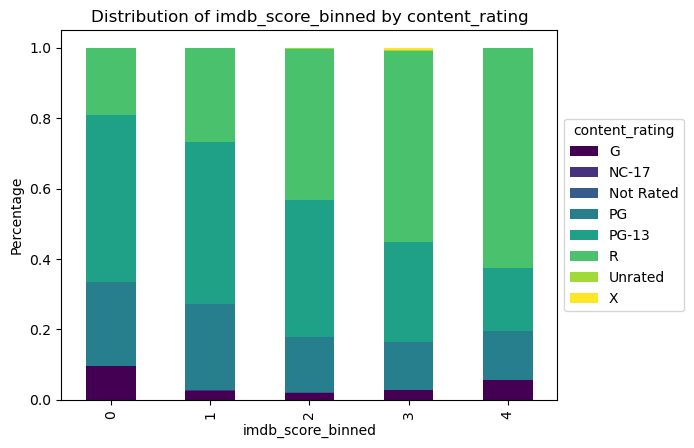

content_rating            G     NC-17  Not Rated        PG     PG-13  \
imdb_score_binned                                                      
0                  0.095238  0.000000   0.000000  0.238095  0.476190   
1                  0.023923  0.004785   0.000000  0.244019  0.459330   
2                  0.018367  0.000680   0.002721  0.155102  0.389116   
3                  0.026975  0.000000   0.001927  0.134875  0.283237   
4                  0.055556  0.000000   0.000000  0.138889  0.180556   

content_rating            R   Unrated         X  
imdb_score_binned                                
0                  0.190476  0.000000  0.000000  
1                  0.267943  0.000000  0.000000  
2                  0.429932  0.002041  0.002041  
3                  0.543353  0.003854  0.005780  
4                  0.625000  0.000000  0.000000

In [47]:
plot_stacked_bar(train_data_21, 'content_rating', label_column, legend = True)

In [48]:
calculate_category_proportions(train_data_21, 'content_rating')

R            0.444784
PG-13        0.365779
PG           0.158883
G            0.022698
X            0.002619
Unrated      0.002182
Not Rated    0.002182
NC-17        0.000873
Name: content_rating, dtype: float64

In [49]:
train_one_hot_encoding_content_rating = encode_categorical_column(train_data_21['content_rating'])
test_one_hot_encoding_content_rating = encode_categorical_column(X_test_21['content_rating'])
train_one_hot_encoding_content_rating, test_one_hot_encoding_content_rating = align_train_test_columns(train_one_hot_encoding_content_rating, test_one_hot_encoding_content_rating)

#### 2.2.4 genres

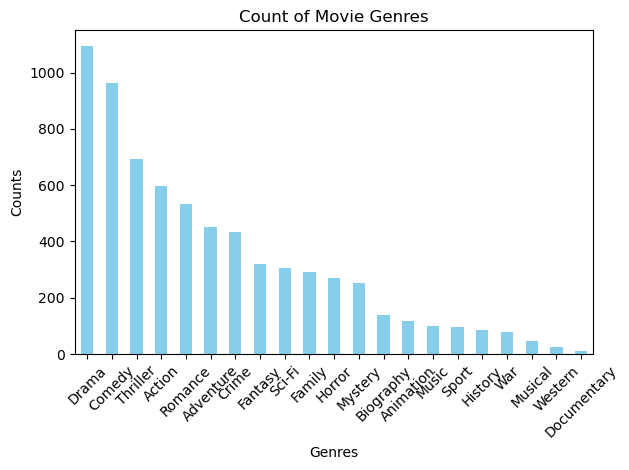

In [50]:
genres_count = train_data_21['genres'].str.split('|').explode().value_counts()
genres_count.plot(kind='bar', color='skyblue')
plt.title('Count of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [51]:
train_multivalue_genres = multivalue_categorical_column(train_data_21['genres'])
test_multivalue_genres = multivalue_categorical_column(X_test_21['genres'])
train_multivalue_genres, test_multivalue_genres = align_train_test_columns(train_multivalue_genres, test_multivalue_genres)

In [52]:
train_data_22 = train_data_21.drop(["country", "language", "content_rating", "genres"], axis = 1)
X_test_22 = X_test_21.drop(["country", "language", "content_rating", "genres"], axis = 1)

train_data_22 = pd.concat([simplified_convert_category_to_numbers_country,
                                   simplified_convert_category_to_numbers_language,
                                   train_one_hot_encoding_content_rating,
                                   train_multivalue_genres,
                                   train_data_22], axis=1)

X_test_22 = pd.concat([test_simplified_convert_category_to_numbers_country,
                                   test_simplified_convert_category_to_numbers_language,
                                   test_one_hot_encoding_content_rating,
                                   test_multivalue_genres,
                                   X_test_22], axis=1)

### 2.3 Text Data Information and Preprocess

In [53]:
def count_unique_rows(data):
    unique_rows_df = data.drop_duplicates()
    number_of_unique_rows = len(unique_rows_df)
    return number_of_unique_rows

In [54]:
def svm_feature_label(feature, label):
    X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)
    svm_classifier = SVC(kernel='rbf', C=1.0)
    svm_classifier.fit(X_train, y_train)
    predictions = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("accuracy: :", accuracy)
    predictions = svm_classifier.predict(feature)
    return predictions

In [55]:
def pca(feature, n_components = 2):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(feature)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca

In [56]:
def filter_df(data1, data2):
    indexes = data1.index
    filtered_data = data2.loc[indexes]
    return filtered_data

#### 2.3.1  Name

In [57]:
name =  ['director_name', 'actor_2_name','actor_1_name', 'actor_3_name']
print("Shape of train_countvec_actor_1_name:", train_countvec_actor_1_name.shape)
print("Shape of train_countvec_actor_2_name:", train_countvec_actor_2_name.shape)
print("Shape of train_countvec_director_name:", train_countvec_director_name.shape)

Shape of train_countvec_actor_1_name: (3004, 2063)
Shape of train_countvec_actor_2_name: (3004, 2919)
Shape of train_countvec_director_name: (3004, 2113)


In [58]:
train_countvec_director_name.head()

0     1     2     3     4     5     6     7     8     9     ...  2103  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...     0   

   2104  2105  2106  2107  2108  2109  2110  2111  2112  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 2113 columns]

#### 2.3.2 Movie title & title_embedding

In [59]:
title = ['movie_title', 'title_embedding']
train_data_22['movie_title'].head()

0       The Lion King 
1    Land of the Dead 
2                 Joe 
3           The Thing 
5      Ocean's Eleven 
Name: movie_title, dtype: object

In [60]:
print("movie_title has ")
count_unique_rows(train_data_22['movie_title'])

movie_title has 


2247

In [61]:
print("Shape of train_fasttext_title_embeddings:", train_fasttext_title_embeddings.shape)

Shape of train_fasttext_title_embeddings: (3004, 100)


In [62]:
train_fasttext_title_embeddings = filter_df(train_data_22, train_fasttext_title_embeddings)
train_fasttext_title_embeddings.shape

(2291, 100)

#### 2.3.3 plot_keywords

In [63]:
train_doc2vec_features_plot_keywords.head()


0         1         2         3         4         5         6   \
0 -0.002800 -0.004956  0.002163 -0.002374  0.000194  0.000719  0.002124   
1  0.002123  0.000288 -0.003020 -0.003211  0.004548  0.002667 -0.003825   
2 -0.002241 -0.000525  0.003643 -0.002979  0.001827  0.001142 -0.001680   
3 -0.000630 -0.002083 -0.000896 -0.002147 -0.002247  0.003739 -0.004067   
4 -0.002958 -0.001376 -0.001714 -0.003555 -0.004828 -0.001836  0.002245   

         7         8         9   ...        90        91        92        93  \
0  0.002463 -0.001238 -0.003811  ... -0.000493 -0.003545  0.004082  0.003446   
1  0.002729 -0.002934  0.002267  ...  0.003673  0.001285  0.002591 -0.000728   
2  0.001540  0.003105 -0.002446  ... -0.001566 -0.002651  0.004508 -0.001642   
3 -0.003067 -0.002898  0.001222  ...  0.003669  0.002197 -0.003719  0.002790   
4 -0.002323  0.000544  0.002296  ...  0.004995  0.003198  0.002475 -0.003280   

         94        95        96        97        98        99  
0 -0.000907  0.001471 -0.001883  0.002502 -0.002413 -0.000206  
1  0.003440 -0.003017  0.001101  0.004059  0.002112 -0.002319  
2 -0.004585 -0.003740  0.003329  0.003480 -0.004858  0.004275  
3  0.004540 -0.000552 -0.004196  0.003911 -0.001663 -0.003593  
4 -0.000682  0.002077  0.003112 -0.004794 -0.001134 -0.004481  

[5 rows x 100 columns]

In [64]:
print("Shape of train_doc2vec_features_plot_keywords :", train_doc2vec_features_plot_keywords.shape)

Shape of train_doc2vec_features_plot_keywords : (3004, 100)


In [65]:
train_doc2vec_features_plot_keywords = filter_df(train_data_22, train_doc2vec_features_plot_keywords)
train_doc2vec_features_plot_keywords

0         1         2         3         4         5         6   \
0    -0.002800 -0.004956  0.002163 -0.002374  0.000194  0.000719  0.002124   
1     0.002123  0.000288 -0.003020 -0.003211  0.004548  0.002667 -0.003825   
2    -0.002241 -0.000525  0.003643 -0.002979  0.001827  0.001142 -0.001680   
3    -0.000630 -0.002083 -0.000896 -0.002147 -0.002247  0.003739 -0.004067   
5    -0.003958  0.001438  0.001508  0.001801 -0.002234  0.003507 -0.001848   
...        ...       ...       ...       ...       ...       ...       ...   
2996 -0.003033  0.004743  0.001087 -0.000330  0.003347 -0.000170  0.003257   
2997  0.003336 -0.000516  0.002810 -0.001257  0.003514  0.003562  0.001278   
2998 -0.004227 -0.001031  0.003652  0.002707 -0.001787  0.002306 -0.004457   
3001 -0.004208  0.000275 -0.004846  0.004768 -0.001497 -0.001104  0.002103   
3003 -0.002065 -0.000019  0.004347  0.004597  0.000165  0.004280  0.002522   

            7         8         9   ...        90        91        92  \
0     0.002463 -0.001238 -0.003811  ... -0.000493 -0.003545  0.004082   
1     0.002729 -0.002934  0.002267  ...  0.003673  0.001285  0.002591   
2     0.001540  0.003105 -0.002446  ... -0.001566 -0.002651  0.004508   
3    -0.003067 -0.002898  0.001222  ...  0.003669  0.002197 -0.003719   
5     0.002858  0.003594 -0.000645  ... -0.002746  0.001900  0.002280   
...        ...       ...       ...  ...       ...       ...       ...   
2996 -0.000258  0.002882  0.000485  ... -0.001698  0.003148  0.000240   
2997 -0.001881  0.002121  0.003563  ...  0.003294 -0.004494 -0.002168   
2998 -0.004227  0.001684 -0.001385  ... -0.001856  0.000914 -0.000688   
3001  0.002355 -0.002910 -0.003924  ... -0.000448  0.001015 -0.003083   
3003 -0.004955  0.002637  0.001531  ...  0.005145  0.003222  0.002762   

            93        94        95        96        97        98        99  
0     0.003446 -0.000907  0.001471 -0.001883  0.002502 -0.002413 -0.000206  
1    -0.000728  0.003440 -0.003017  0.001101  0.004059  0.002112 -0.002319  
2    -0.001642 -0.004585 -0.003740  0.003329  0.003480 -0.004858  0.004275  
3     0.002790  0.004540 -0.000552 -0.004196  0.003911 -0.001663 -0.003593  
5     0.004721 -0.003258  0.003426 -0.003850  0.002890  0.003776  0.001614  
...        ...       ...       ...       ...       ...       ...       ...  
2996  0.003605 -0.000596 -0.001190  0.004560 -0.003212 -0.000320 -0.003583  
2997 -0.004591 -0.000836 -0.002560  0.003606 -0.004325 -0.000721 -0.002268  
2998 -0.001930 -0.003969 -0.001243 -0.003217 -0.001006 -0.003645  0.000786  
3001  0.004713  0.000275 -0.001687 -0.000377 -0.002161 -0.001096 -0.001649  
3003  0.002074  0.004017 -0.005390  0.001765 -0.004136  0.001411 -0.001716  

[2291 rows x 100 columns]

In [66]:
train_data_22['movie_title']

0                   The Lion King 
1                Land of the Dead 
2                             Joe 
3                       The Thing 
5                  Ocean's Eleven 
                   ...            
2996             Dawn of the Dead 
2997              Fahrenheit 9/11 
2998          Here Comes the Boom 
3001          Law Abiding Citizen 
3003    Instructions Not Included 
Name: movie_title, Length: 2291, dtype: object

In [67]:
data = {
    'Feature': ['director_name', 'actor_1_name', 'actor_2_name', 'title_embeddings', 'plot_keywords'],
    'Columns': [train_countvec_director_name.shape[1], 
                train_countvec_actor_1_name.shape[1], 
                train_countvec_actor_2_name.shape[1], 
                train_fasttext_title_embeddings.shape[1],
                train_doc2vec_features_plot_keywords.shape[1]],
    'Unique Count': [count_unique_rows(train_countvec_director_name), 
                     count_unique_rows(train_countvec_actor_1_name), 
                     count_unique_rows(train_countvec_actor_2_name), 
                     count_unique_rows(train_fasttext_title_embeddings),
                     count_unique_rows(train_doc2vec_features_plot_keywords)]
}

results_df = pd.DataFrame(data)
results_df

Feature  Columns  Unique Count
0     director_name     2113          1460
1      actor_1_name     2063          1265
2      actor_2_name     2919          1903
3  title_embeddings      100          2247
4     plot_keywords      100          2291

In [68]:
train_data_23 = train_data_22.drop(text_data, axis = 1)
X_test_22 = X_test_22.drop(text_data, axis = 1)

## 3. Data Splitting

In [69]:
def data_splitting(data, label, test_size=0.2):
    X = data.drop(columns = label)
    y = data[label]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)
    
    print("Training set size:", X_train.shape)
    print("Validation set size:", X_val.shape)

    return X_train, X_val, y_train, y_val

In [70]:
# after preprocess
X_train, X_val, y_train, y_val = data_splitting(train_data_23, 'imdb_score_binned')

Training set size: (1832, 40)
Validation set size: (459, 40)


In [71]:
train_data_before_preprocess = train_data.drop(text_data, axis = 1)

In [72]:
# only numeric data
numeric_data_with_label = numeric_data + [label_column]
# after preprocess
ap_n_train_data = train_data_23[numeric_data_with_label]
ap_n_X_train, ap_n_X_val, ap_n_y_train, ap_n_y_val = data_splitting(ap_n_train_data, 'imdb_score_binned')

# before preprocess
bp_n_train_data  = train_data_before_preprocess[numeric_data_with_label]
bp_n_X_train, bp_n_X_val, bp_n_y_train, bp_n_y_val = data_splitting(bp_n_train_data, 'imdb_score_binned')

Training set size: (1832, 7)
Validation set size: (459, 7)
Training set size: (2403, 7)
Validation set size: (601, 7)


In [73]:
# only category data
ap_c_train_data = train_data_23.drop(columns = numeric_data)
ap_c_X_train, ap_c_X_val, ap_c_y_train, ap_c_y_val = data_splitting(ap_c_train_data, 'imdb_score_binned')

Training set size: (1832, 33)
Validation set size: (459, 33)


In [74]:
X_test_3 = X_test_22.drop('id', axis=1)
ID = X_test_22['id']

### 3.1 Random Oversampling

In [75]:
def random_oversampling(X_train, y_train):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

### 3.2 Feature Selection

In [76]:
def calculate_mutual_information(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, index=X.columns, name='MI Scores')
    return mi_scores.sort_values(ascending=False)


In [77]:
threshold = 0.01
mi_scores = calculate_mutual_information(X_train, y_train)
print("Mutual Information：\n", mi_scores)
selected_features = mi_scores[mi_scores > threshold].index

Mutual Information：
 num_voted_users              0.195024
movie_facebook_likes         0.087102
duration                     0.085172
director_facebook_likes      0.059944
Drama                        0.055364
gross                        0.044490
Horror                       0.024347
Sport                        0.021486
title_year                   0.019371
language                     0.018034
Comedy                       0.017661
content_rating_Unrated       0.015611
Biography                    0.014853
History                      0.013133
content_rating_X             0.011595
average_degree_centrality    0.011554
Musical                      0.007631
content_rating_Approved      0.003857
Sci-Fi                       0.001584
Romance                      0.001265
Adventure                    0.000206
War                          0.000000
Thriller                     0.000000
Western                      0.000000
Mystery                      0.000000
country                      

In [78]:
# after
X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test_3 = X_test_3[selected_features]

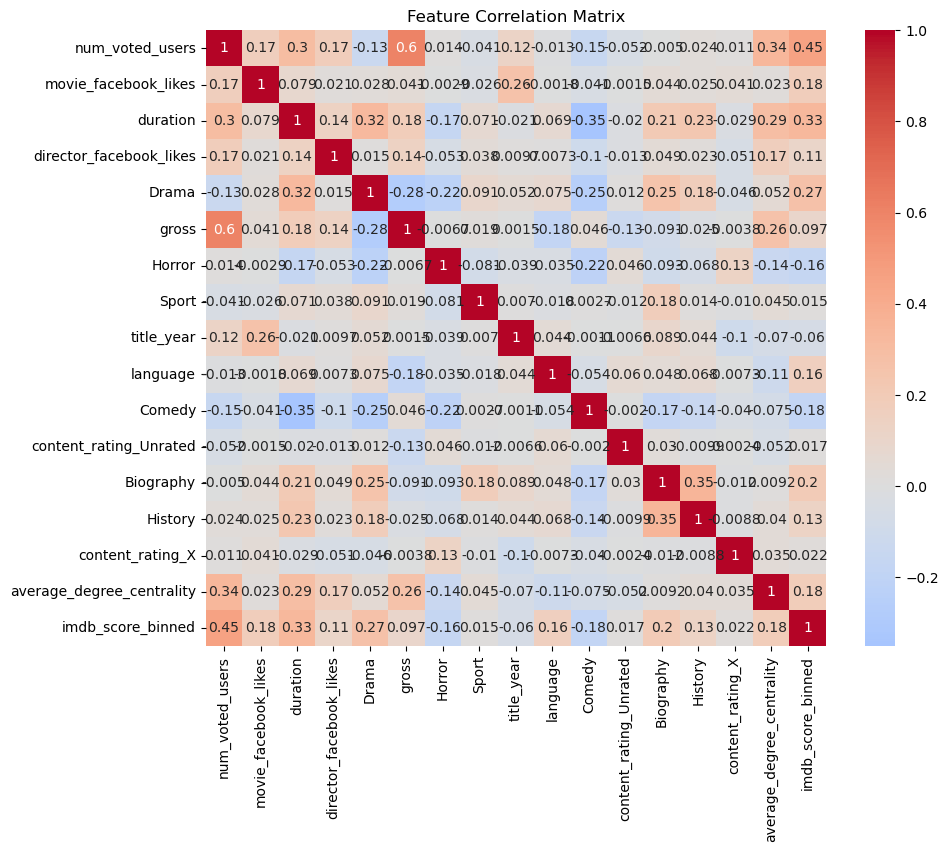

In [79]:
check_corr = pd.concat([X_train, y_train], axis = 1)
corr_matrix = check_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## 4. Model Training

In [80]:
def learning_curve(test_train_df, para, model):
    para_value = test_train_df[para]
    train_scores = test_train_df.iloc[:, 1]
    test_scores = test_train_df.iloc[:, 2]



    plt.figure(figsize=(10, 6))
    plt.plot(para_value, train_scores, label='Training Accuracy', marker='o', linestyle='-', color='blue')
    plt.plot(para_value, test_scores, label='Testing Accuracy', marker='s', linestyle='--', color='red')


    plt.legend()
    plt.title(f'{model} Accuracy vs. {para}')
    plt.xlabel(para)
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()


### 4.0 Baseline Zero-Rule Model

In [168]:
def zero_r_predictor(y_train, X_val, y_val):
    most_common_class = y_train.mode()[0]
    print("most common class:", most_common_class)
    y_pred = [most_common_class] * len(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

In [169]:
zero_r_predictor(y_train, X_val, y_val)

most common class: 2


0.6318082788671024

### 4.1  Naive Bayes


#### 4.1.1 Gaussian Naive Bayes

In [83]:
def GNB(X_train, y_train, X_val, y_val):
    
    gnb = GaussianNB()
    cv_scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Cross-validation accuracy scores: {cv_scores}')
    print(f'Mean cross-validation accuracy: {cv_scores.mean()}')
    
    gnb.fit(X_train, y_train)
    y_val_pred = gnb.predict(X_val)
    

    class_report = classification_report(y_val, y_val_pred)
    print('Classification Report:')
    print(class_report)

    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return cv_scores.mean()

Cross-validation accuracy scores: [0.04632153 0.04359673 0.08196721 0.06284153 0.03551913]
Mean cross-validation accuracy: 0.05404922499664984
Classification Report:
              precision    recall  f1-score   support

           0       0.02      1.00      0.03         6
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00       290
           3       0.36      0.05      0.09        96
           4       0.18      0.50      0.26        18

    accuracy                           0.04       459
   macro avg       0.11      0.31      0.08       459
weighted avg       0.08      0.04      0.03       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


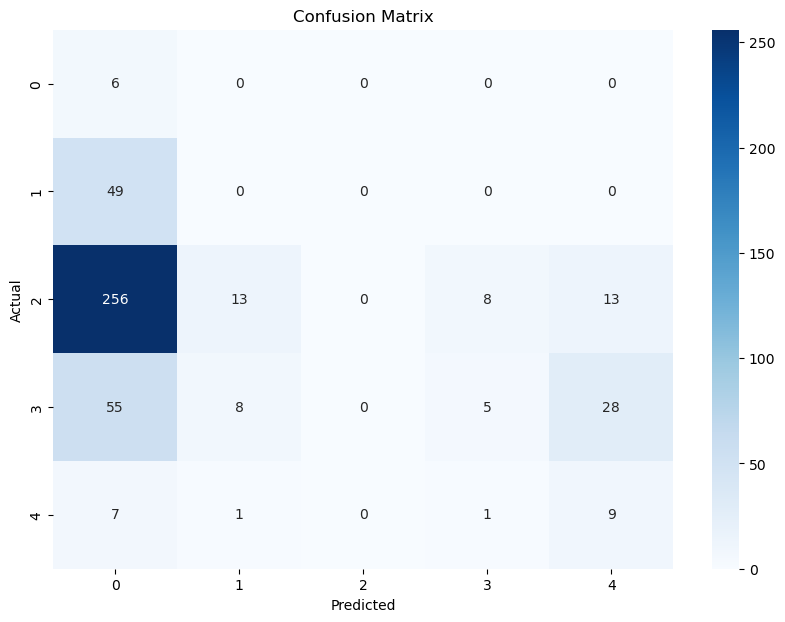

In [84]:
# after preprocess
af_accuracy = GNB(X_train, y_train, X_val, y_val)


#### discussion area

Cross-validation accuracy scores: [0.60706861 0.62993763 0.63409563 0.60833333 0.6125    ]
Mean cross-validation accuracy: 0.6183870408870409
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.30      0.12      0.18        48
           2       0.68      0.83      0.75       377
           3       0.45      0.30      0.36       152
           4       0.32      0.37      0.34        19

    accuracy                           0.62       601
   macro avg       0.35      0.32      0.32       601
weighted avg       0.58      0.62      0.59       601



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


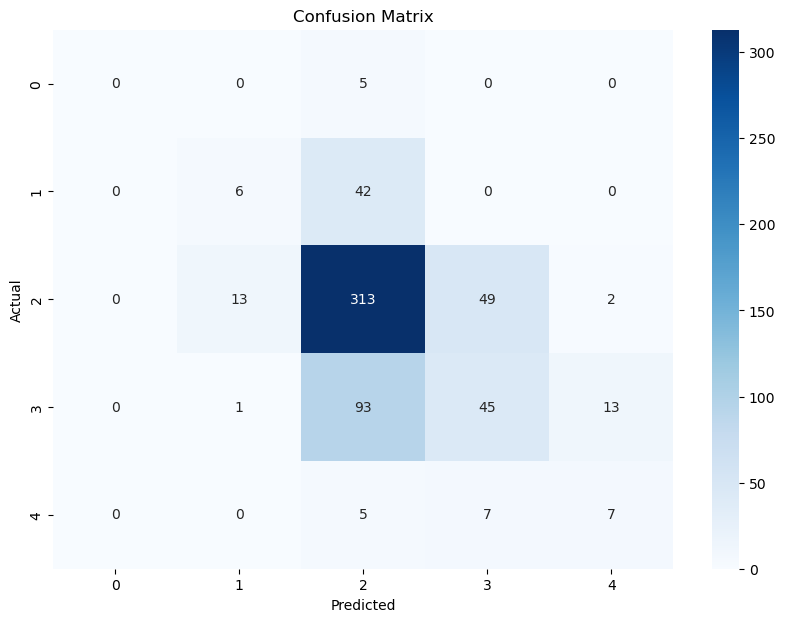

In [85]:
# before preprocess numeric
bp_n_accuracy = GNB(bp_n_X_train, bp_n_y_train, bp_n_X_val, bp_n_y_val)

Cross-validation accuracy scores: [0.63487738 0.62942779 0.62295082 0.63387978 0.60655738]
Mean cross-validation accuracy: 0.6255386310507587
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.36      0.18      0.24        49
           2       0.73      0.84      0.78       290
           3       0.46      0.34      0.40        96
           4       0.32      0.50      0.39        18

    accuracy                           0.64       459
   macro avg       0.48      0.41      0.41       459
weighted avg       0.62      0.64      0.62       459



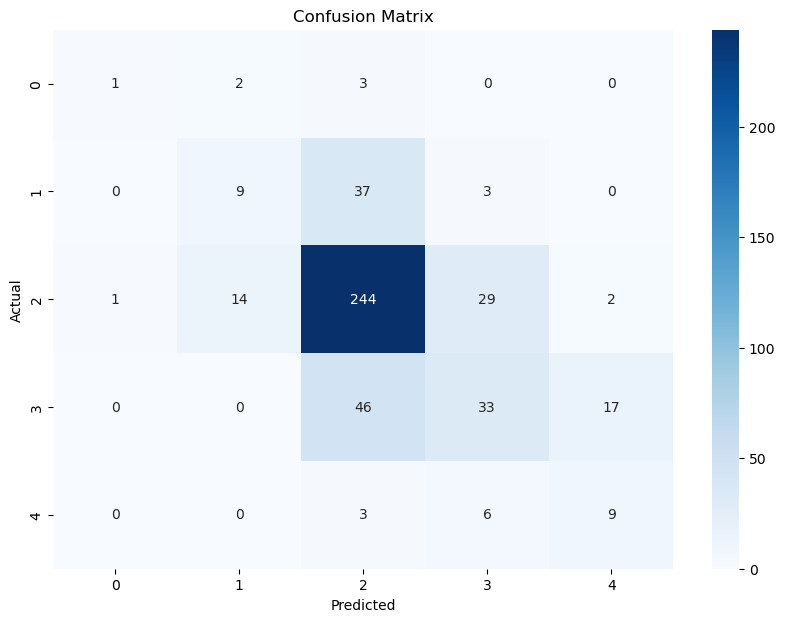

In [86]:
# after preprocess numeric
ap_n_accuracy = GNB(ap_n_X_train, ap_n_y_train, ap_n_X_val, ap_n_y_val)

Cross-validation accuracy scores: [0.02724796 0.03814714 0.06010929 0.06557377 0.03551913]
Mean cross-validation accuracy: 0.04531945623203942
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.67      0.02         6
           1       0.14      0.10      0.12        49
           2       0.00      0.00      0.00       290
           3       0.33      0.02      0.04        96
           4       0.06      0.28      0.10        18

    accuracy                           0.03       459
   macro avg       0.11      0.21      0.06       459
weighted avg       0.09      0.03      0.02       459



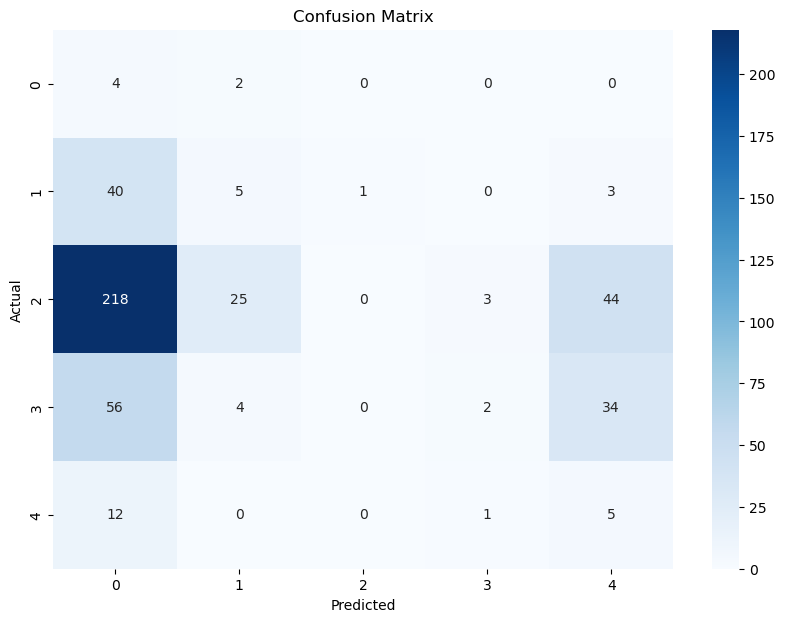

In [87]:
# after preprocess category
ap_c_accuracy = GNB(ap_c_X_train, ap_c_y_train, ap_c_X_val, ap_c_y_val)

In [88]:
multinomialNB_model = MultinomialNB(alpha=1.0)
multinomialNB_model.fit(ap_c_X_train, ap_c_y_train)
mnb_y_pred = multinomialNB_model.predict(ap_c_X_val)
mnb_accuracy = accuracy_score(ap_c_y_val, mnb_y_pred)
print('Accuracy:', mnb_accuracy)


Accuracy: 0.6339869281045751


In [89]:
GNB_data = {
    'Before Preprocess (Numeric)': [bp_n_accuracy],
    'After Preprocess (Numeric)': [ap_n_accuracy],
    'After Preprocess (Category)': [ap_c_accuracy],
    'After Preprocess (Category with MNB)': [mnb_accuracy],
    'After Preprocess (Mixed)': [af_accuracy]
}

GNB_acc_data = pd.DataFrame(GNB_data, index=["accuracy"])
GNB_acc_data

Before Preprocess (Numeric)  After Preprocess (Numeric)  \
accuracy                     0.618387                    0.625539   

          After Preprocess (Category)  After Preprocess (Category with MNB)  \
accuracy                     0.045319                              0.633987   

          After Preprocess (Mixed)  
accuracy                  0.054049

In [90]:
# X_test
gnb_test = GaussianNB()
gnb_test.fit(X_train, y_train)
GNB_y_pred = gnb_test.predict(X_test_3)
GNB_y_pred = pd.DataFrame(GNB_y_pred)
result = pd.concat([ID, GNB_y_pred], axis = 1)
result.to_csv('output_GNB.csv', index=False)

### 4.2 KNN

In [93]:
def knn(X_train, y_train, X_val, y_val, k_range = range(1, 31), weights = None):
    results = {'k': [], 'train_score': [], 'test_score': []}
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights= weights)
        cv_results = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True, scoring='accuracy')
        train_mean = cv_results['train_score'].mean()
        test_mean = cv_results['test_score'].mean()
        results['k'].append(k)
        results['train_score'].append(train_mean)
        results['test_score'].append(test_mean)
    
    results = pd.DataFrame(results)
    learning_curve(results, 'k', 'KNN')
    max_test_score_row = results.loc[results['test_score'].idxmax()]
    best_k = int(max_test_score_row['k'])
    print("best_k:", best_k)

    best_knn = KNeighborsClassifier(n_neighbors=best_k, weights=weights)
    best_knn.fit(X_train, y_train)
    y_val_pred = best_knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation accuracy with best k={best_k}: {accuracy}')

    class_report = classification_report(y_val, y_val_pred)
    print('Classification Report:')
    print(class_report)

    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return best_k, accuracy

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

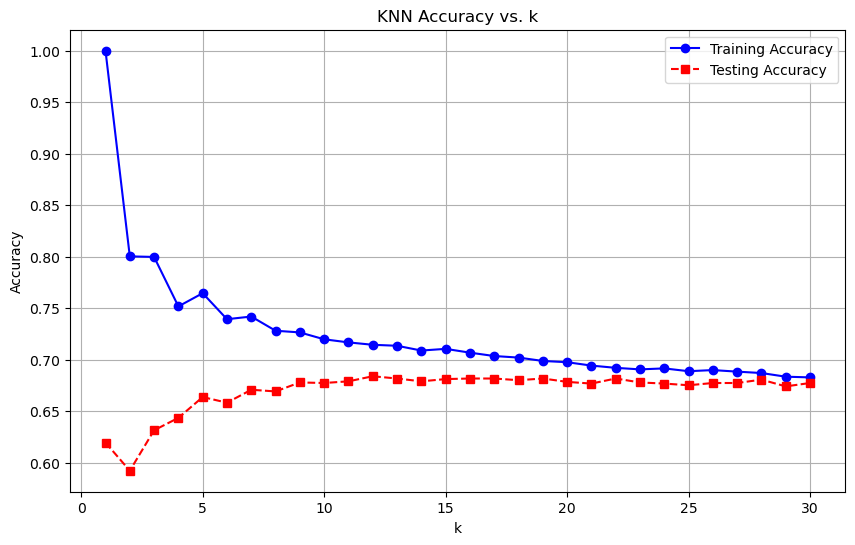

best_k: 12
Validation accuracy with best k=12: 0.6993464052287581
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.46      0.12      0.19        49
           2       0.72      0.92      0.81       290
           3       0.63      0.46      0.53        96
           4       1.00      0.17      0.29        18

    accuracy                           0.70       459
   macro avg       0.56      0.33      0.36       459
weighted avg       0.67      0.70      0.65       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedM

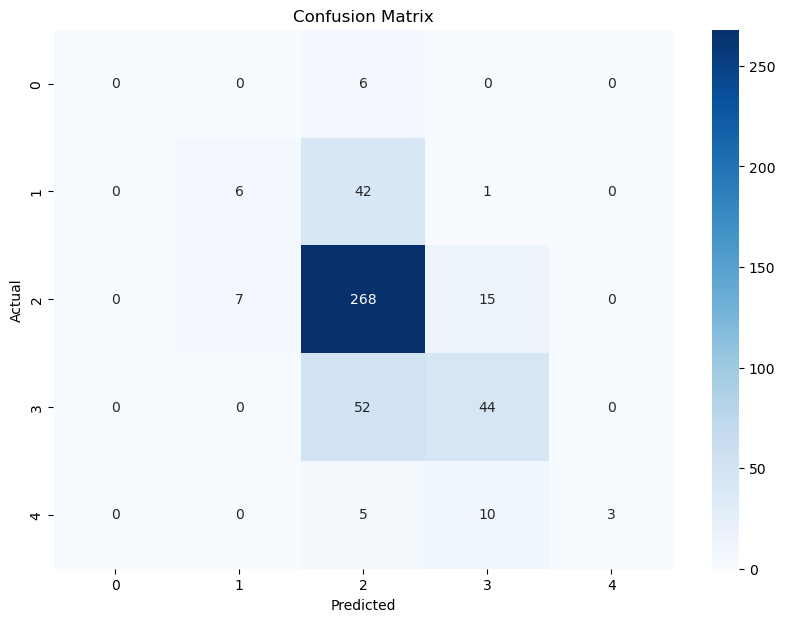

In [94]:
# after preprocess
ap_best_k, ap_knn_accuracy = knn(X_train, y_train, X_val, y_val)

#### discussion area for knn

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

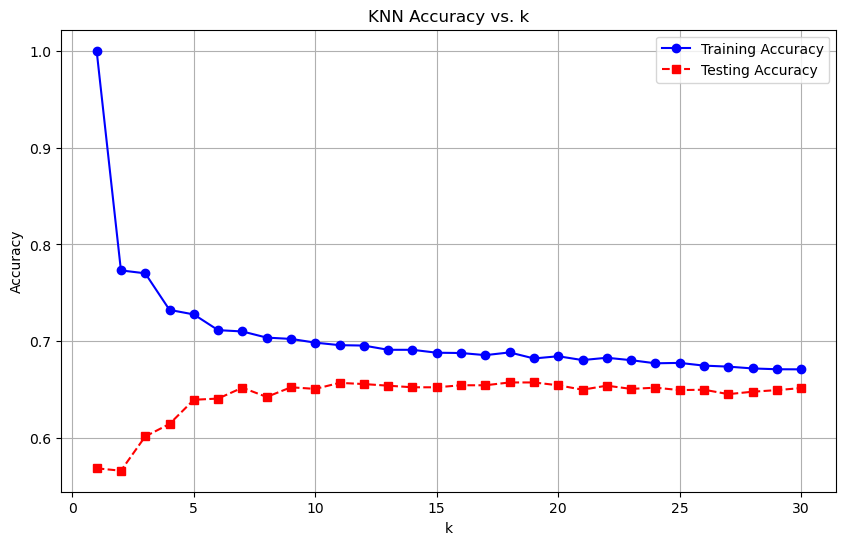

best_k: 18
Validation accuracy with best k=18: 0.6522462562396006
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.04      0.08        48
           2       0.68      0.89      0.77       377
           3       0.51      0.34      0.40       152
           4       0.80      0.21      0.33        19

    accuracy                           0.65       601
   macro avg       0.60      0.30      0.32       601
weighted avg       0.66      0.65      0.60       601



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedM

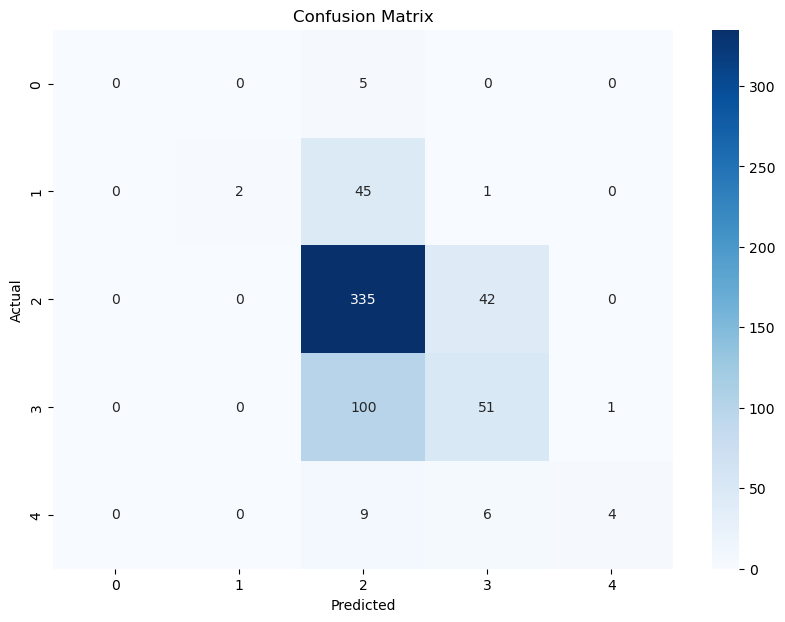

In [95]:
# before preprocess numeric
bp_best_k, bp_n_knn_accuracy = knn(bp_n_X_train, bp_n_y_train, bp_n_X_val, bp_n_y_val)

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

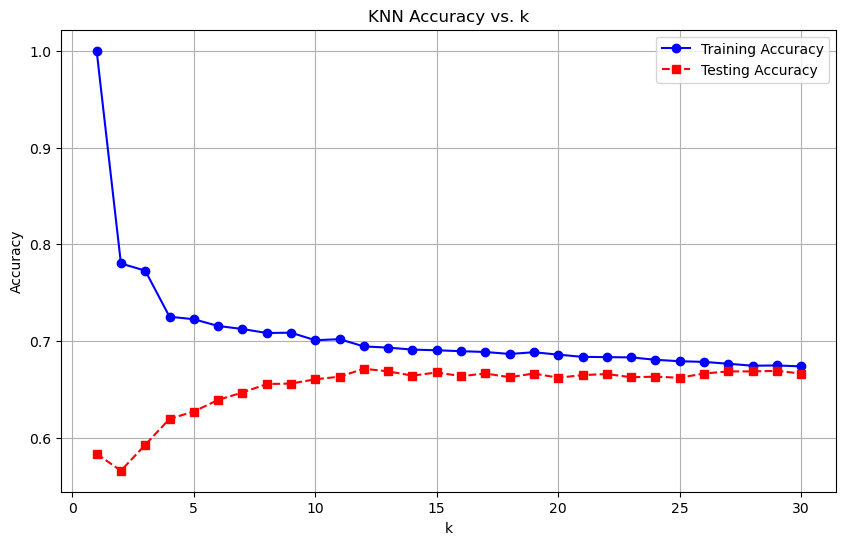

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


best_k: 12
Validation accuracy with best k=12: 0.6884531590413944
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.46      0.12      0.19        49
           2       0.71      0.95      0.81       290
           3       0.60      0.32      0.42        96
           4       1.00      0.22      0.36        18

    accuracy                           0.69       459
   macro avg       0.55      0.32      0.36       459
weighted avg       0.66      0.69      0.63       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


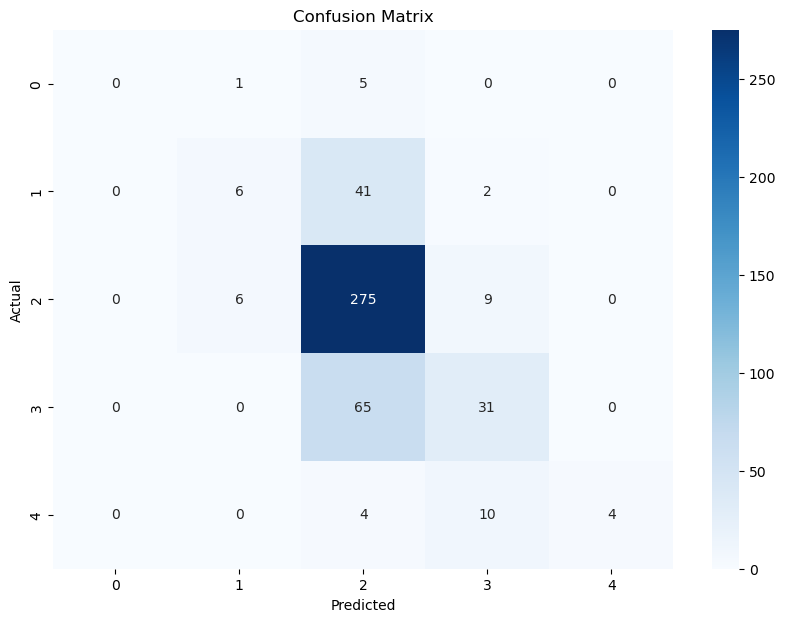

In [96]:
# after preprocess numeric
ap_best_k, ap_n_knn_accuracy = knn(ap_n_X_train, ap_n_y_train, ap_n_X_val, ap_n_y_val)

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

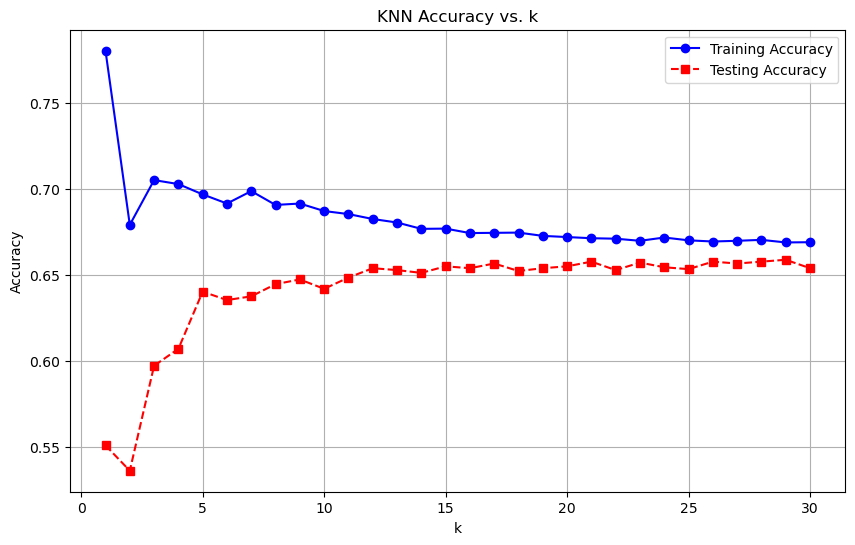

best_k: 29
Validation accuracy with best k=29: 0.6492374727668845
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.66      0.96      0.78       290
           3       0.50      0.21      0.29        96
           4       0.00      0.00      0.00        18

    accuracy                           0.65       459
   macro avg       0.23      0.23      0.22       459
weighted avg       0.52      0.65      0.56       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedM

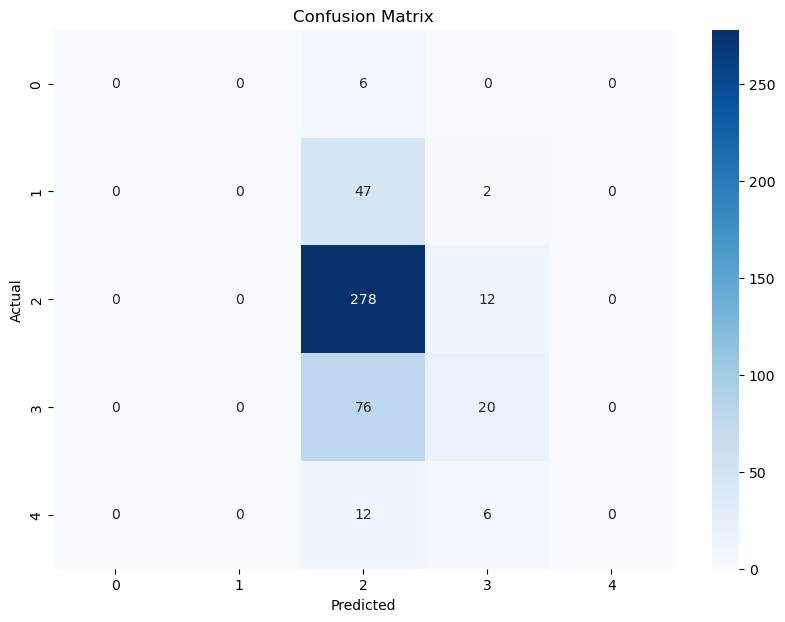

In [97]:
# after preprocess category
ap_c_best_k, ap_c_knn_accuracy = knn(ap_c_X_train, ap_c_y_train, ap_c_X_val, ap_c_y_val)

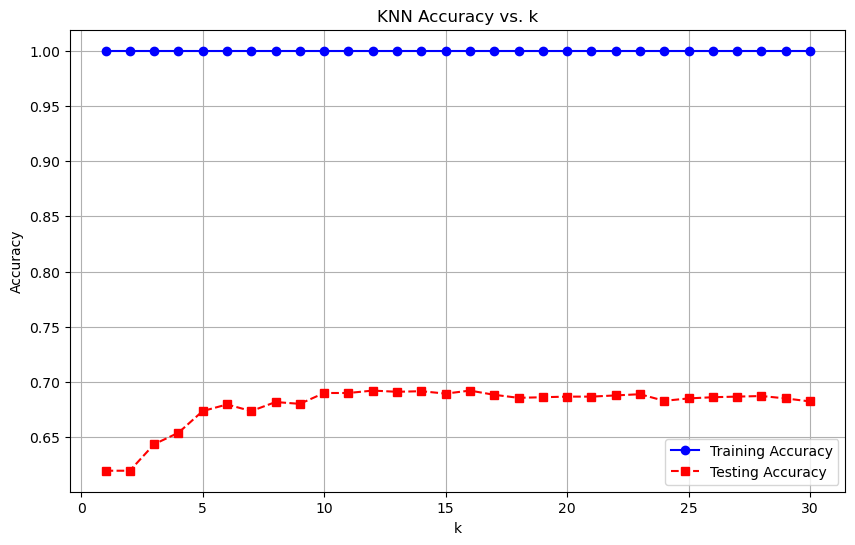

best_k: 12
Validation accuracy with best k=12: 0.7124183006535948
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.14      0.22        49
           2       0.74      0.91      0.82       290
           3       0.61      0.53      0.57        96
           4       1.00      0.28      0.43        18

    accuracy                           0.71       459
   macro avg       0.57      0.37      0.41       459
weighted avg       0.69      0.71      0.68       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


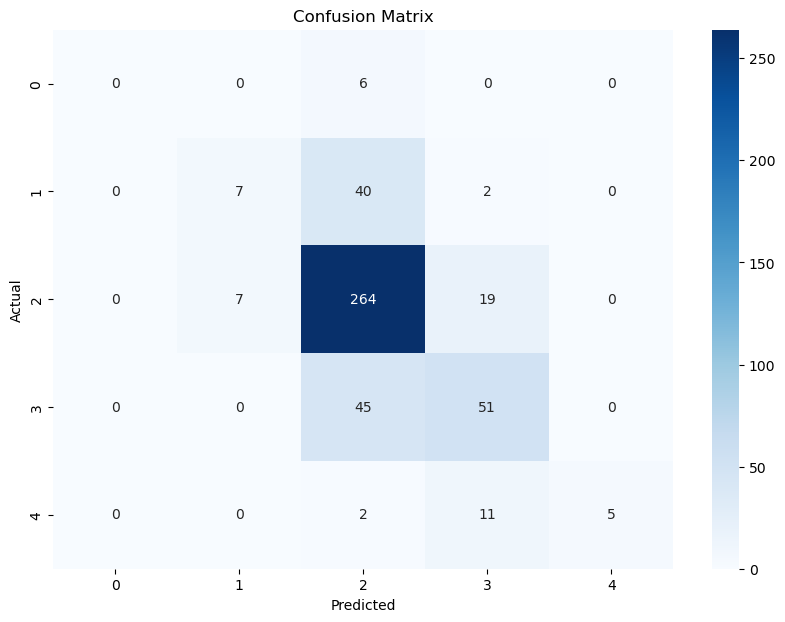

In [98]:
# Weighted K-NN 
ap_weighted_best_k, ap__weighted_knn_accuracy = knn(X_train, y_train, X_val, y_val, weights = 'distance')


#### knn results

In [99]:
KNN_data = {
    'Before Preprocess (Numeric)': [bp_n_knn_accuracy],
    'After Preprocess (Numeric)': [ap_n_knn_accuracy],
    'After Preprocess (Category)': [ap_c_knn_accuracy],
    'After Preprocess (Mixed)': [ap_knn_accuracy],
    'After Preprocess (Mixed with Weighted)': [ap__weighted_knn_accuracy]
}

KNN_acc_data = pd.DataFrame(KNN_data, index=["accuracy"])
KNN_acc_data

Before Preprocess (Numeric)  After Preprocess (Numeric)  \
accuracy                     0.652246                    0.688453   

          After Preprocess (Category)  After Preprocess (Mixed)  \
accuracy                     0.649237                  0.699346   

          After Preprocess (Mixed with Weighted)  
accuracy                                0.712418

In [100]:
# X_test
knn_test = KNeighborsClassifier(n_neighbors = ap_weighted_best_k,  weights = 'distance')
knn_test.fit(X_train, y_train)
knn_y_pred = knn_test.predict(X_test_3)
knn_y_pred = pd.DataFrame(knn_y_pred)
knn_result = pd.concat([ID, knn_y_pred], axis = 1)
knn_result.to_csv('output_KNN.csv', index=False)

### 4.3 Decision Tree

In [101]:
def dt(X_train, y_train,  X_val, y_val, depth_range = range(1, 11)):
    results = {'depth': [], 'train_score': [], 'test_score': []}
    for depth in depth_range:
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
        cv_results = cross_validate(dt, X_train, y_train, cv=5, return_train_score=True, scoring='accuracy')
        train_mean = cv_results['train_score'].mean()
        test_mean = cv_results['test_score'].mean()
        results['depth'].append(depth)
        results['train_score'].append(train_mean)
        results['test_score'].append(test_mean)
    
    results = pd.DataFrame(results)
    learning_curve(results, 'depth', 'Decision Tree')
    max_test_score_row = results.loc[results['test_score'].idxmax()]
    best_depth = max_test_score_row['depth']

    best_dt = DecisionTreeClassifier(max_depth=best_depth)
    best_dt.fit(X_train, y_train)
    y_val_pred = best_dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation accuracy with best depth={best_depth}: {accuracy}')

    class_report = classification_report(y_val, y_val_pred)
    print('Classification Report:')
    print(class_report)

    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    importances = best_dt.feature_importances_
    feature_names = X_train.columns
    features_importance = zip(feature_names, importances)
    
    sorted_features = sorted(features_importance, key=lambda x: x[1], reverse=True)
    
    features = [x[0] for x in sorted_features]
    importances = [x[1] for x in sorted_features]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances, color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()
    
    
    return best_depth, accuracy

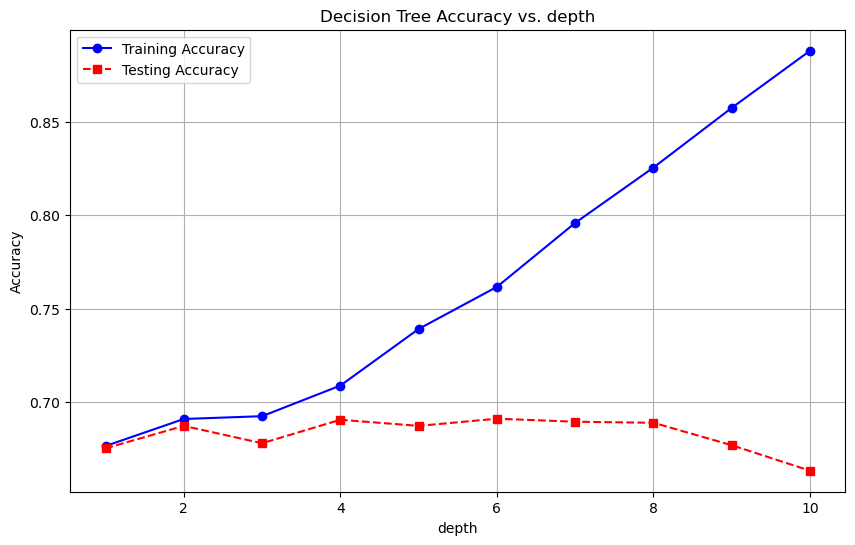

Validation accuracy with best depth=6.0: 0.6949891067538126
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.73      0.91      0.81       290
           3       0.57      0.49      0.53        96
           4       0.62      0.44      0.52        18

    accuracy                           0.69       459
   macro avg       0.38      0.37      0.37       459
weighted avg       0.60      0.69      0.64       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


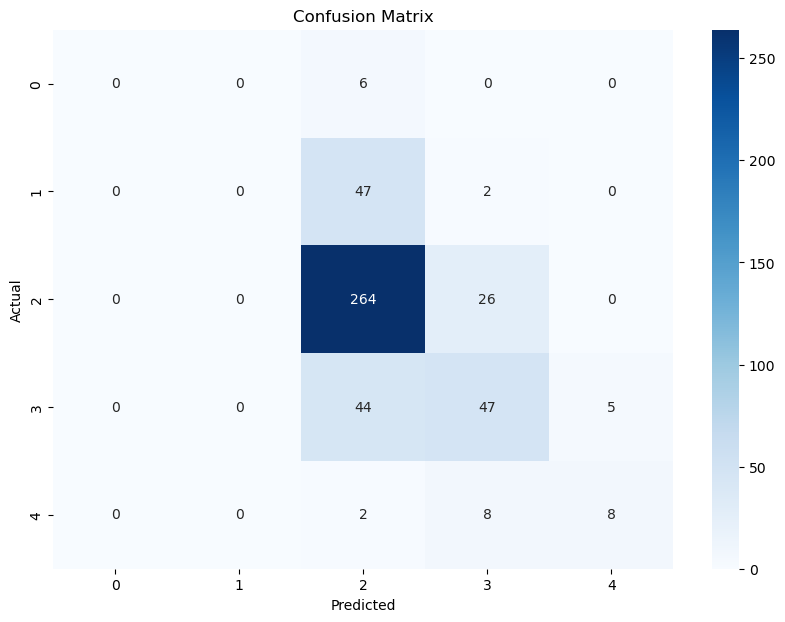

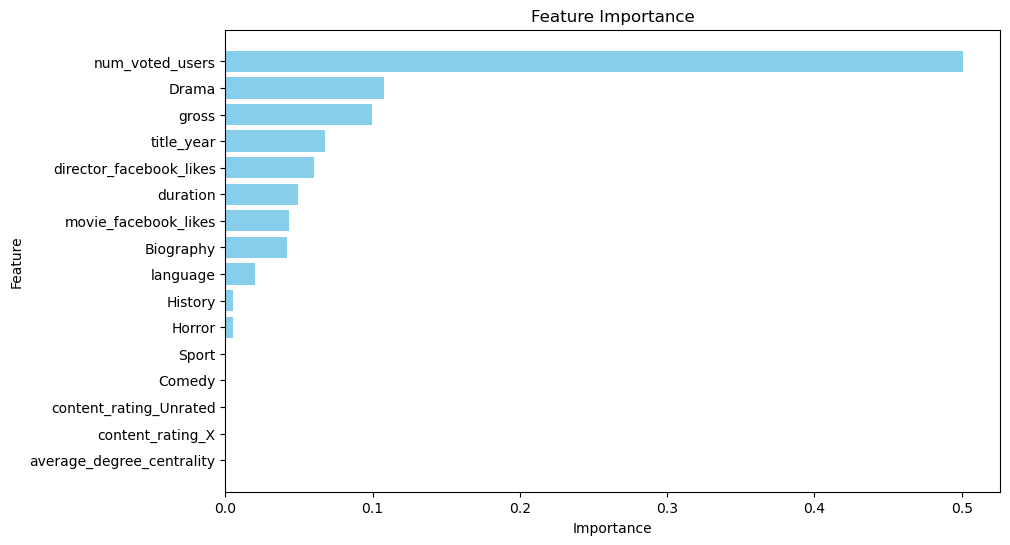

In [102]:
# after preprocess
ap_best_depth, ap_dt_accuracy = dt(X_train, y_train, X_val, y_val)

#### Discussion area of DT

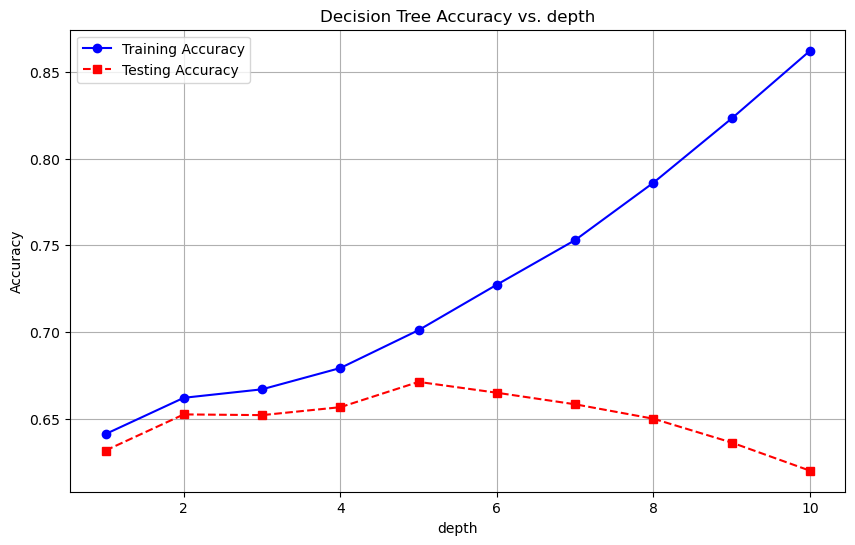

Validation accuracy with best depth=5.0: 0.6821963394342762
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        48
           2       0.70      0.92      0.79       377
           3       0.59      0.36      0.44       152
           4       0.71      0.53      0.61        19

    accuracy                           0.68       601
   macro avg       0.40      0.36      0.37       601
weighted avg       0.61      0.68      0.63       601



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


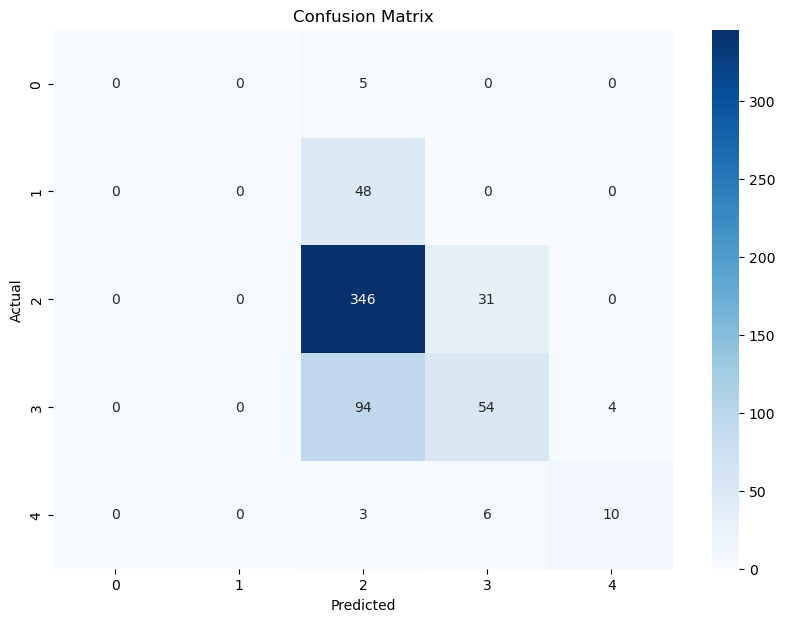

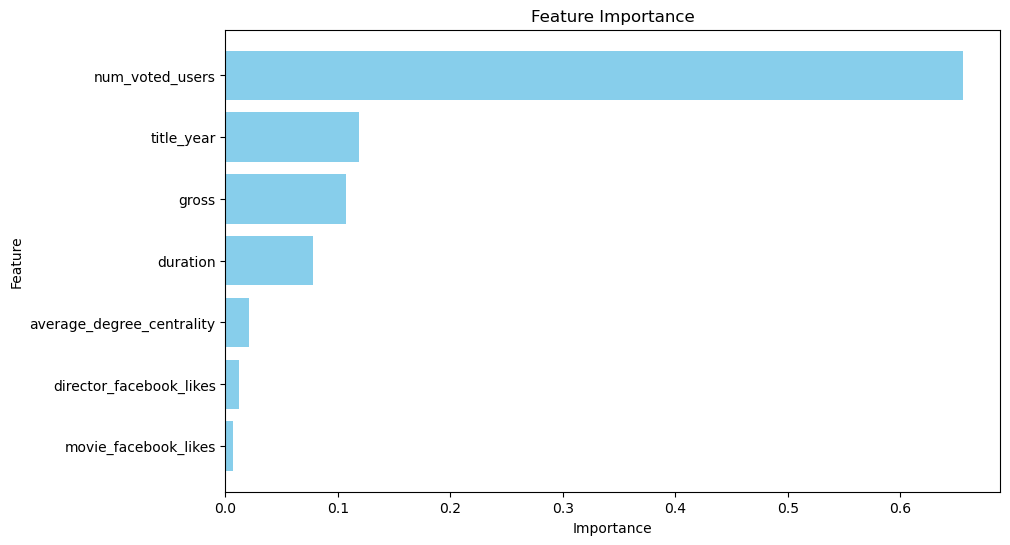

In [103]:
# before preprocess numeric
bp_best_depth, bp_n_dt_accuracy = dt(bp_n_X_train, bp_n_y_train, bp_n_X_val, bp_n_y_val)

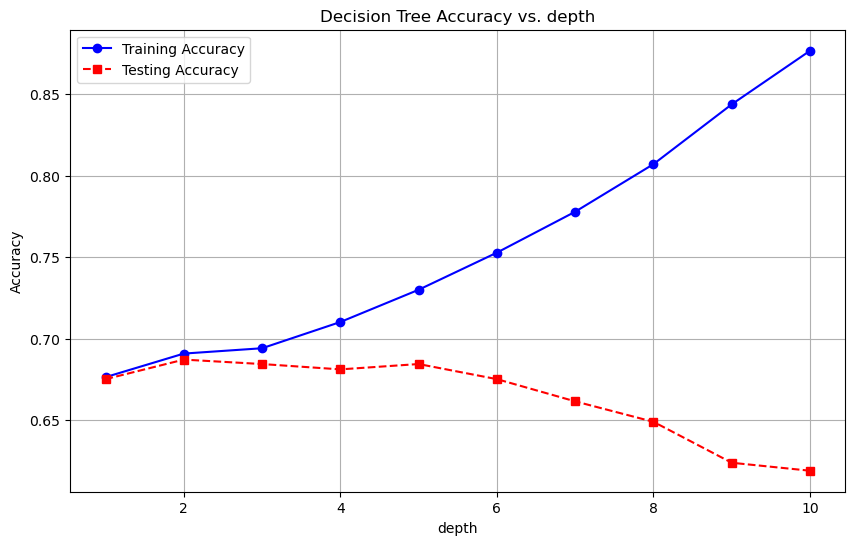

Validation accuracy with best depth=2.0: 0.690631808278867
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.71      0.93      0.81       290
           3       0.57      0.41      0.48        96
           4       0.73      0.44      0.55        18

    accuracy                           0.69       459
   macro avg       0.40      0.36      0.37       459
weighted avg       0.60      0.69      0.63       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


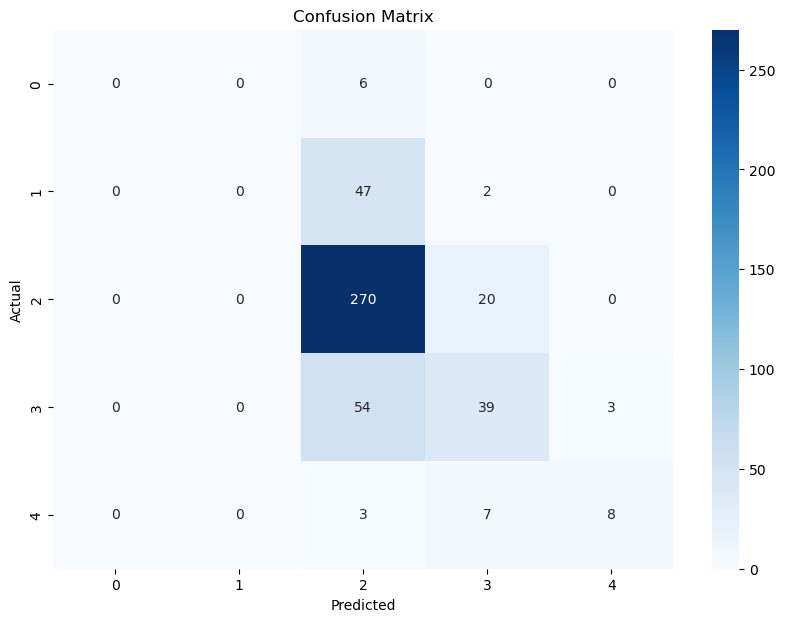

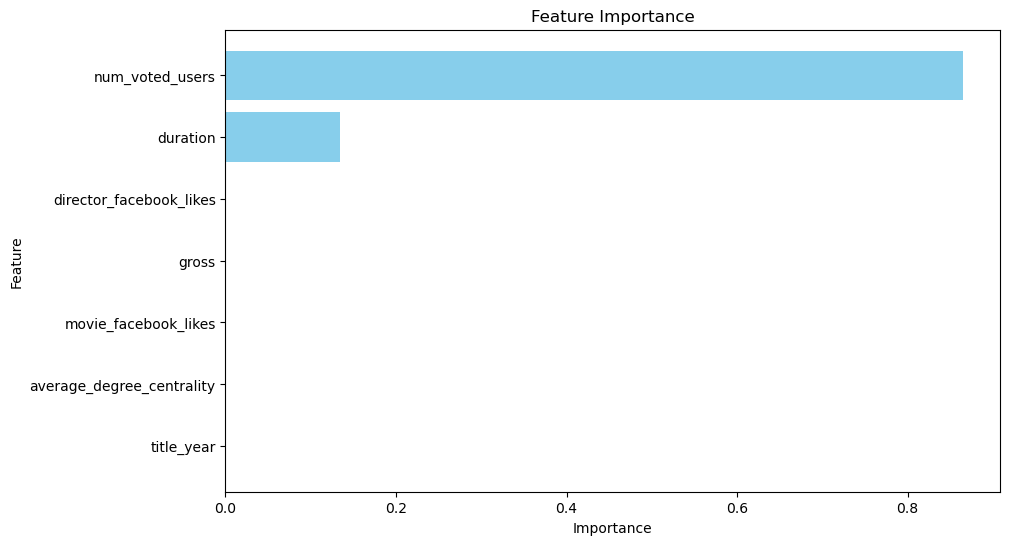

In [104]:
# after preprocess numeric
ap_best_depth, ap_n_dt_accuracy = dt(ap_n_X_train, ap_n_y_train, ap_n_X_val, ap_n_y_val)

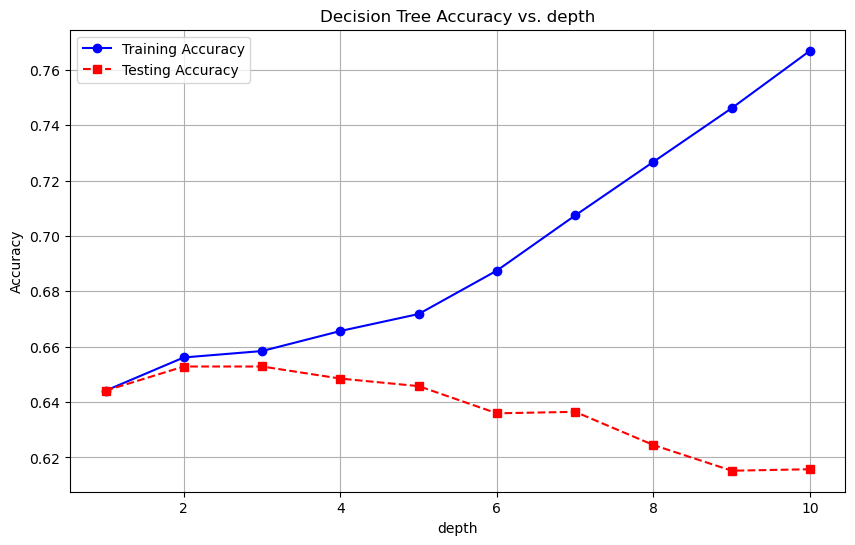

Validation accuracy with best depth=3.0: 0.6339869281045751
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.65      0.95      0.77       290
           3       0.45      0.16      0.23        96
           4       0.00      0.00      0.00        18

    accuracy                           0.63       459
   macro avg       0.22      0.22      0.20       459
weighted avg       0.50      0.63      0.54       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


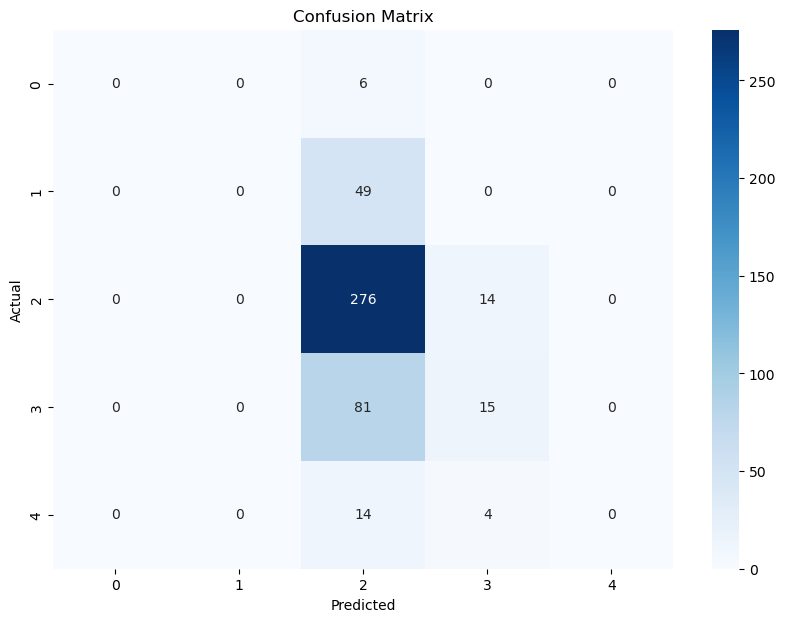

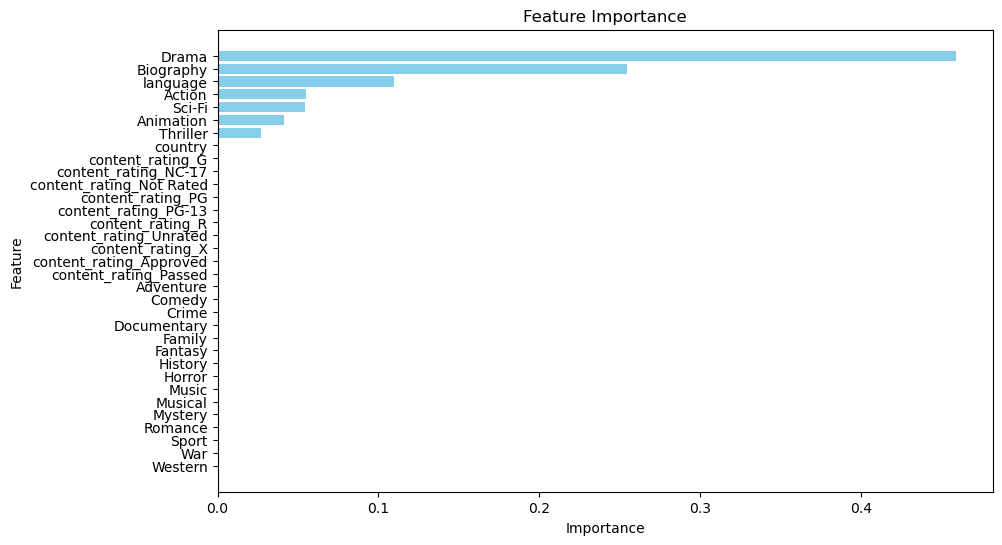

In [105]:
# after preprocess category
ap_c_best_depth, ap_c_dt_accuracy = dt(ap_c_X_train, ap_c_y_train, ap_c_X_val, ap_c_y_val)

#### dt result

In [106]:
dt_data = {
    'Before Preprocess (Numeric)': [bp_n_dt_accuracy],
    'After Preprocess (Numeric)': [ap_n_dt_accuracy],
    'After Preprocess (Category)': [ap_c_dt_accuracy],
    'After Preprocess (Mixed)': [ap_dt_accuracy]
}

dt_acc_data = pd.DataFrame(dt_data, index=["accuracy"])
dt_acc_data

Before Preprocess (Numeric)  After Preprocess (Numeric)  \
accuracy                     0.682196                    0.690632   

          After Preprocess (Category)  After Preprocess (Mixed)  
accuracy                     0.633987                  0.694989

In [107]:
# X_test
dt_test = DecisionTreeClassifier(criterion='entropy', max_depth=ap_best_depth, random_state=42)
dt_test.fit(X_train, y_train)
dt_y_pred = dt_test.predict(X_test_3)
dt_y_pred = pd.DataFrame(dt_y_pred)
dt_result = pd.concat([ID, dt_y_pred], axis = 1)
dt_result.to_csv('output_DT.csv', index=False)

### 4.4 SVM

In [108]:
def svm(X_train, y_train, X_val, y_val, c_range = [0.01, 0.1, 1, 10], kernel = 'linear'):
    results = {'C': [], 'train_score': [], 'test_score': []}
    for c in c_range:
        svm = SVC(kernel=kernel, C=c, random_state=42)
        cv_results = cross_validate(svm, X_train, y_train, cv=5, return_train_score=True, scoring='accuracy')
        train_mean = cv_results['train_score'].mean()
        test_mean = cv_results['test_score'].mean()
        results['C'].append(c)
        results['train_score'].append(train_mean)
        results['test_score'].append(test_mean)

    
    results_df = pd.DataFrame(results)
    learning_curve(results_df, 'C', 'SVM')
    max_test_score_row = results_df.loc[results_df['test_score'].idxmax()]
    best_c = max_test_score_row['C']
    
    best_svm = SVC(kernel='linear', C=best_c, random_state=42)
    best_svm.fit(X_train, y_train)
    
    y_val_pred = best_svm.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Test accuracy with best C={best_c}: {accuracy:.2f}')
    
    class_report = classification_report(y_val, y_val_pred)
    print('Classification Report:')
    print(class_report)
    
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return best_c, accuracy

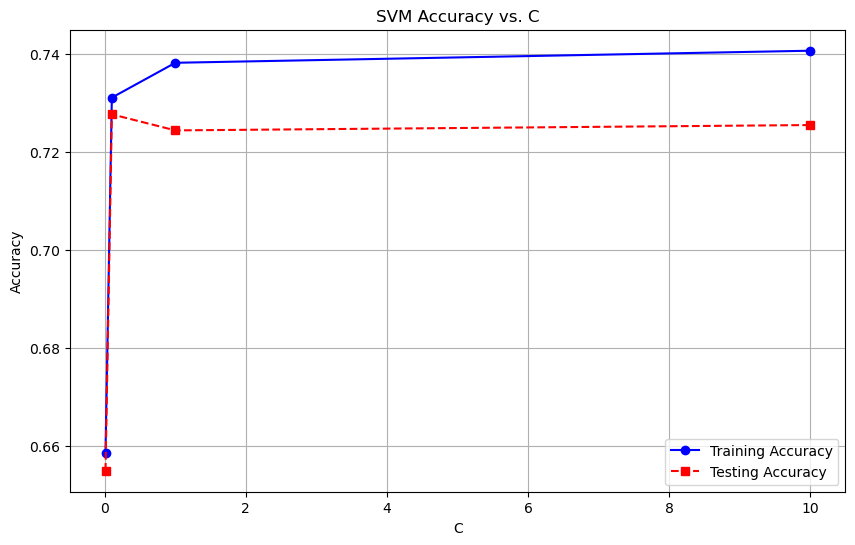

Test accuracy with best C=0.1: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.73      0.96      0.83       290
           3       0.69      0.52      0.60        96
           4       1.00      0.39      0.56        18

    accuracy                           0.73       459
   macro avg       0.49      0.37      0.40       459
weighted avg       0.65      0.73      0.67       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


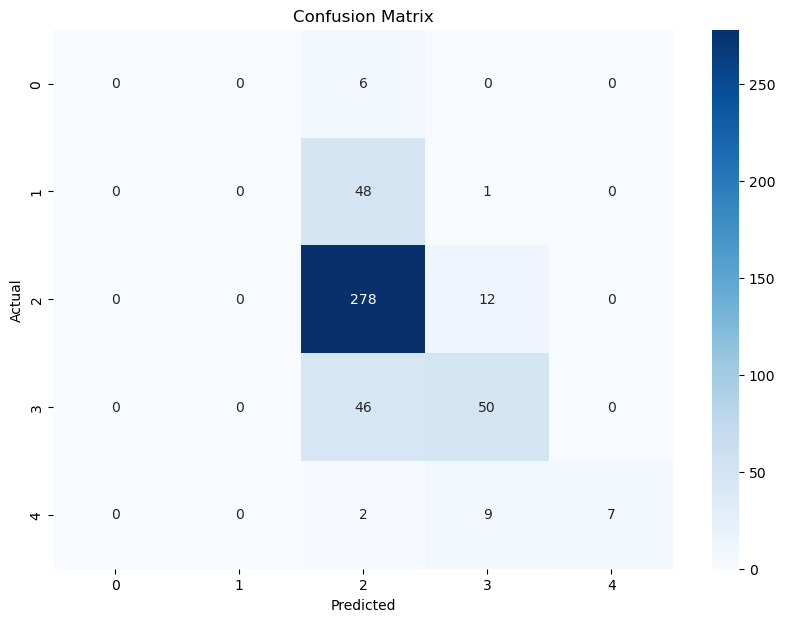

In [178]:
# after preprocess
ap_best_c, ap_svm_accuracy = svm(X_train, y_train, X_val, y_val)

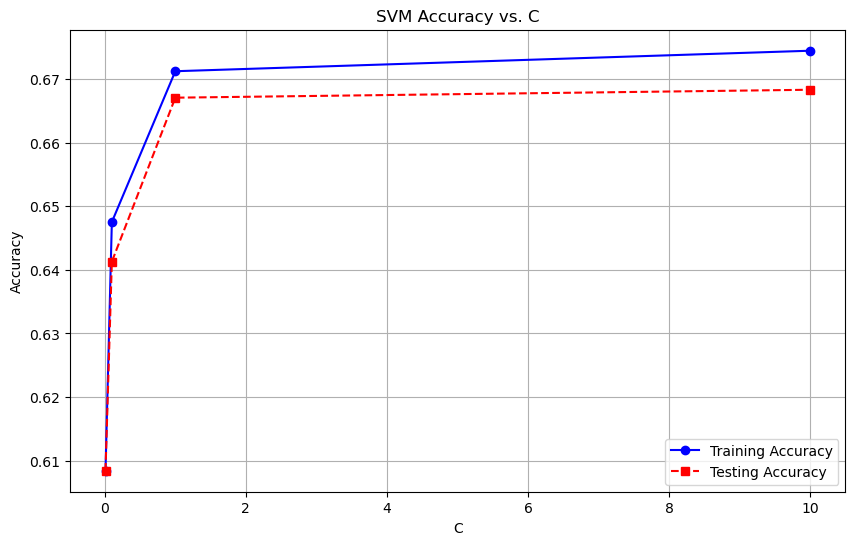

Test accuracy with best C=10.0: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        48
           2       0.68      0.94      0.79       377
           3       0.61      0.28      0.39       152
           4       0.73      0.42      0.53        19

    accuracy                           0.68       601
   macro avg       0.40      0.33      0.34       601
weighted avg       0.61      0.68      0.61       601



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


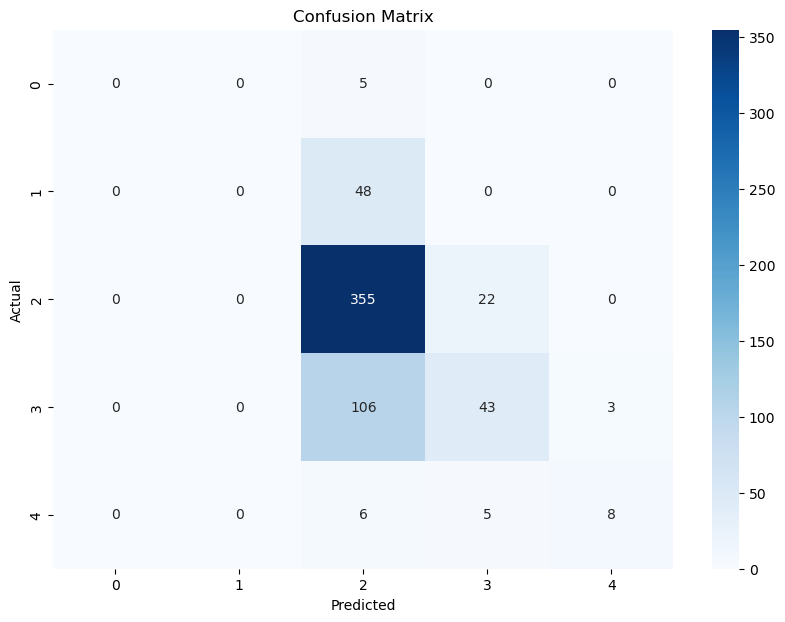

In [110]:
# before preprocess numeric
bp_best_c, bp_n_svm_accuracy = svm(bp_n_X_train, bp_n_y_train, bp_n_X_val, bp_n_y_val)

#### discussion area of svm

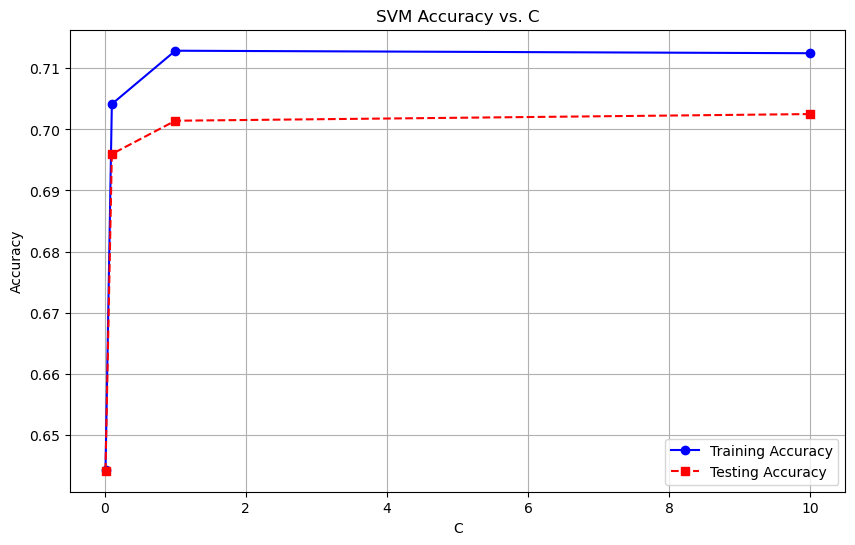

Test accuracy with best C=10.0: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.72      0.95      0.82       290
           3       0.65      0.43      0.52        96
           4       0.58      0.39      0.47        18

    accuracy                           0.71       459
   macro avg       0.39      0.35      0.36       459
weighted avg       0.61      0.71      0.64       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


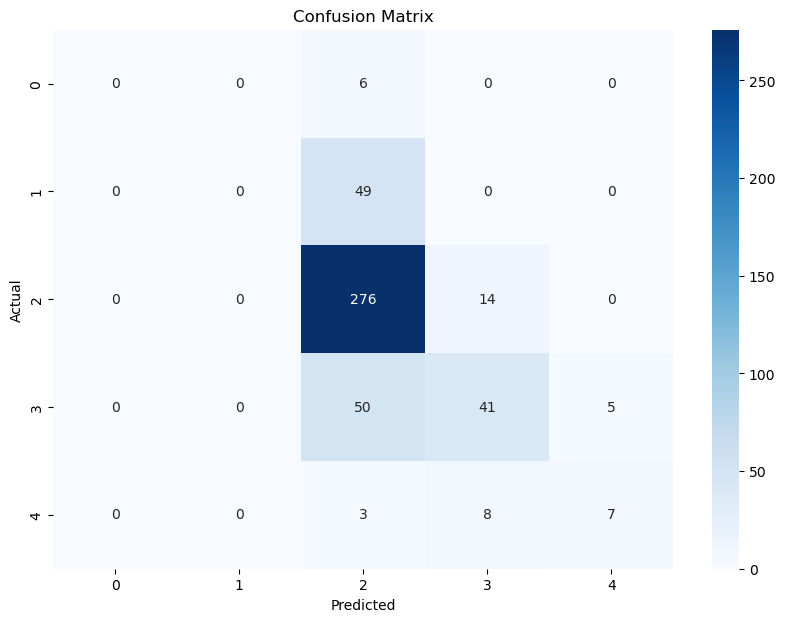

In [111]:
# after preprocess numeric
ap_best_c, ap_n_svm_accuracy = svm(ap_n_X_train, ap_n_y_train, ap_n_X_val, ap_n_y_val)

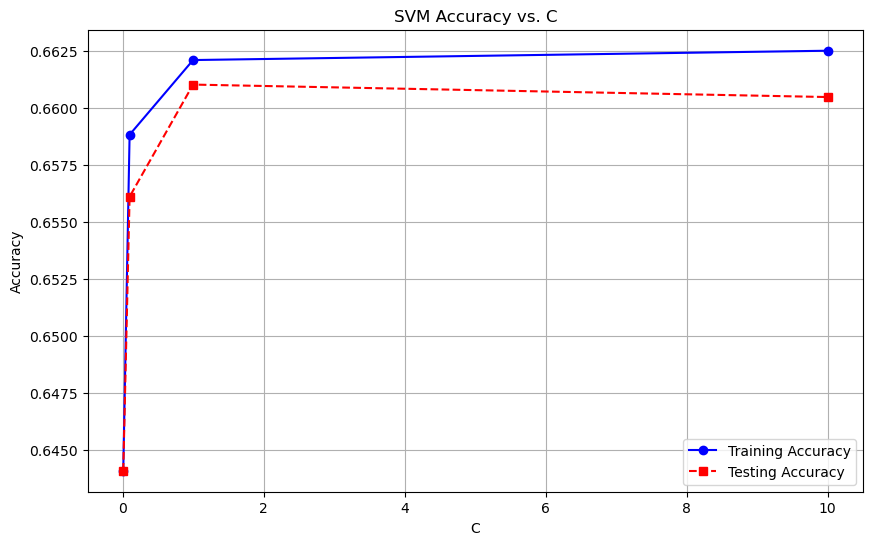

Test accuracy with best C=1.0: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.65      0.95      0.77       290
           3       0.46      0.18      0.26        96
           4       0.00      0.00      0.00        18

    accuracy                           0.64       459
   macro avg       0.22      0.23      0.21       459
weighted avg       0.51      0.64      0.54       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


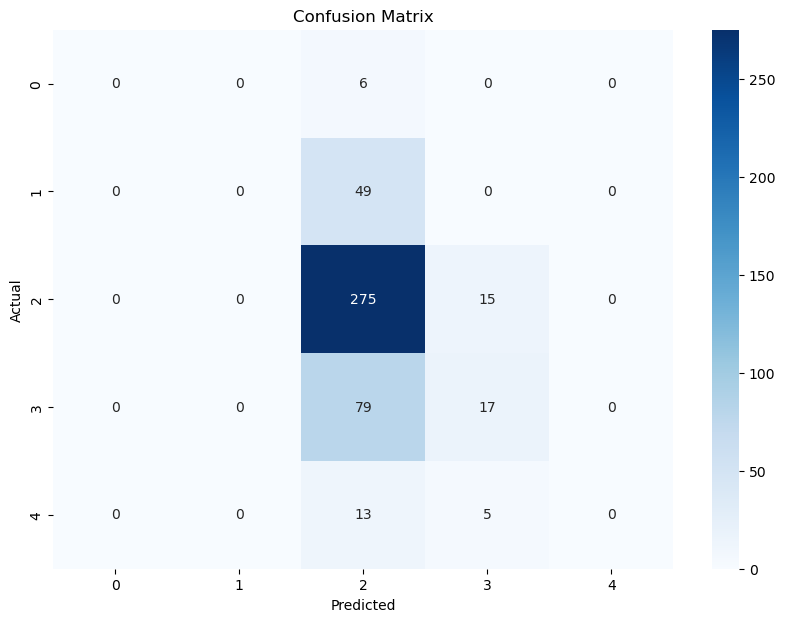

In [112]:
# after preprocess category
ap_c_best_c, ap_c_svm_accuracy = svm(ap_c_X_train, ap_c_y_train, ap_c_X_val, ap_c_y_val)

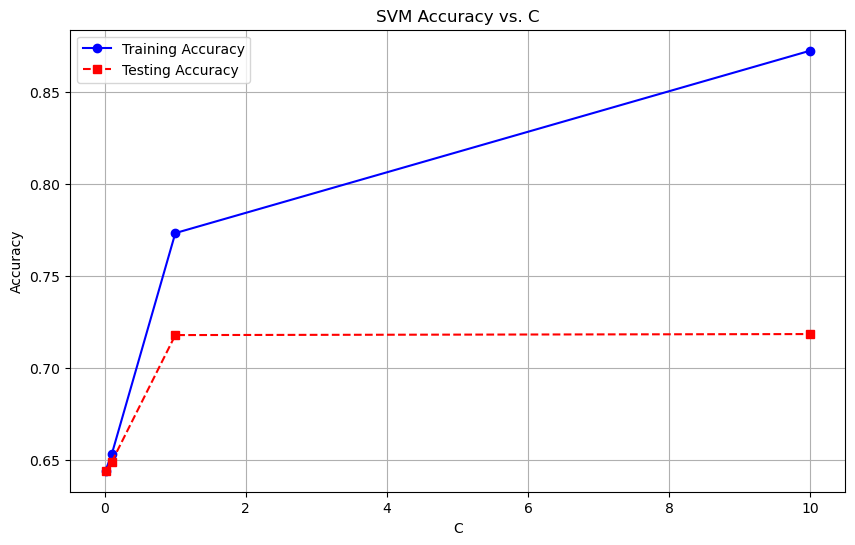

Test accuracy with best C=10.0: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.74      0.94      0.83       290
           3       0.68      0.53      0.60        96
           4       0.69      0.50      0.58        18

    accuracy                           0.73       459
   macro avg       0.42      0.40      0.40       459
weighted avg       0.64      0.73      0.67       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


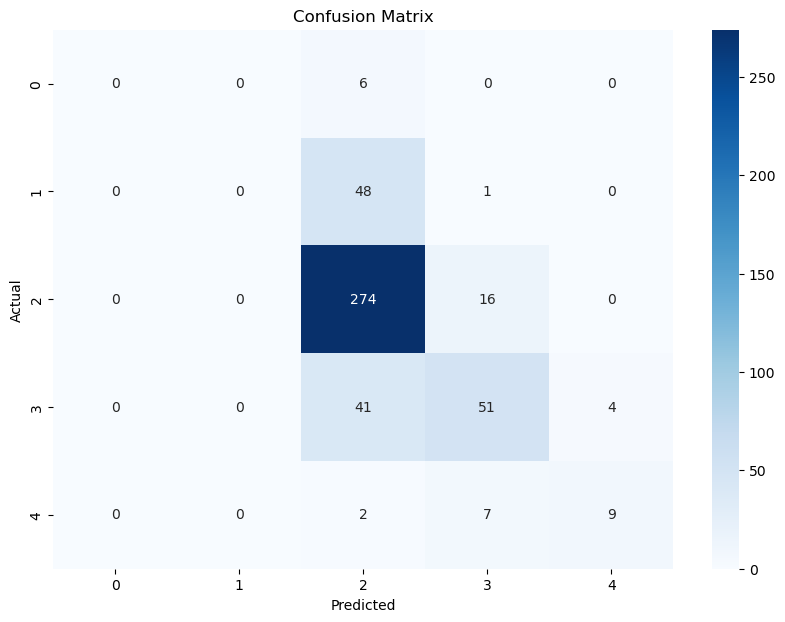

In [113]:
# after preprocess
ap_kernel_best_c, ap_kernel_svm_accuracy = svm(X_train, y_train, X_val, y_val, kernel='rbf')

In [165]:
ap_kernel_best_c

10.0

#### svm result

In [114]:
SVM_data = {
    'Before Preprocess (Numeric)': [bp_n_svm_accuracy],
    'After Preprocess (Numeric)': [ap_n_svm_accuracy],
    'After Preprocess (Category)': [ap_c_svm_accuracy],
    'After Preprocess (Mixed)': [ap_svm_accuracy],
    'After Preprocess (Mixed with kernel trick)': [ap_kernel_svm_accuracy],
    
}

SVM_acc_data = pd.DataFrame(SVM_data, index=["accuracy"])
SVM_acc_data

Before Preprocess (Numeric)  After Preprocess (Numeric)  \
accuracy                     0.675541                    0.705882   

          After Preprocess (Category)  After Preprocess (Mixed)  \
accuracy                     0.636166                  0.729847   

          After Preprocess (Mixed with kernel trick)  
accuracy                                    0.727669

In [115]:
# X_test
svm_test = SVC(kernel ='rbf', C=ap_kernel_best_c, random_state=42)
svm_test.fit(X_train, y_train)
svm_y_pred = svm_test.predict(X_test_3)
svm_y_pred = pd.DataFrame(svm_y_pred)
svm_result = pd.concat([ID, svm_y_pred], axis = 1)
svm_result.to_csv('output_SVM.csv', index=False)

### 4.5 MLP

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.60      0.18      0.28        49
           2       0.79      0.91      0.84       290
           3       0.69      0.71      0.70        96
           4       0.83      0.56      0.67        18

    accuracy                           0.76       459
   macro avg       0.58      0.47      0.50       459
weighted avg       0.74      0.76      0.74       459



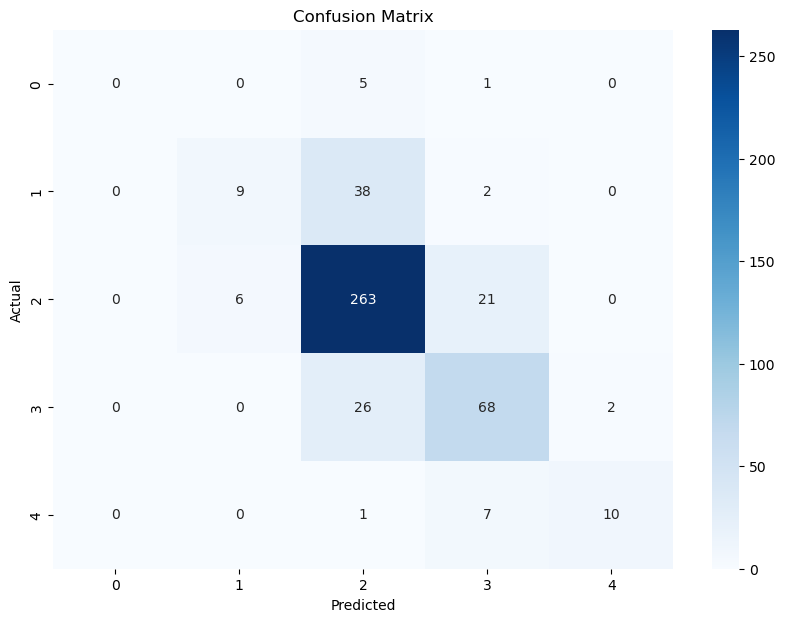

In [167]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, ),
    random_state=42,
    learning_rate_init=0.01,
    solver= 'sgd'
).fit(X_train, y_train)

mlp_y_pred = mlp.predict(X_val)
mlp_ap_accuracy = accuracy_score(y_val, mlp_y_pred)

class_report = classification_report(y_val, mlp_y_pred)
print('Classification Report:')
print(class_report)

conf_matrix = confusion_matrix(y_val, mlp_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### discussion

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        48
           2       0.63      1.00      0.77       377
           3       0.00      0.00      0.00       152
           4       0.00      0.00      0.00        19

    accuracy                           0.63       601
   macro avg       0.13      0.20      0.15       601
weighted avg       0.39      0.63      0.48       601



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


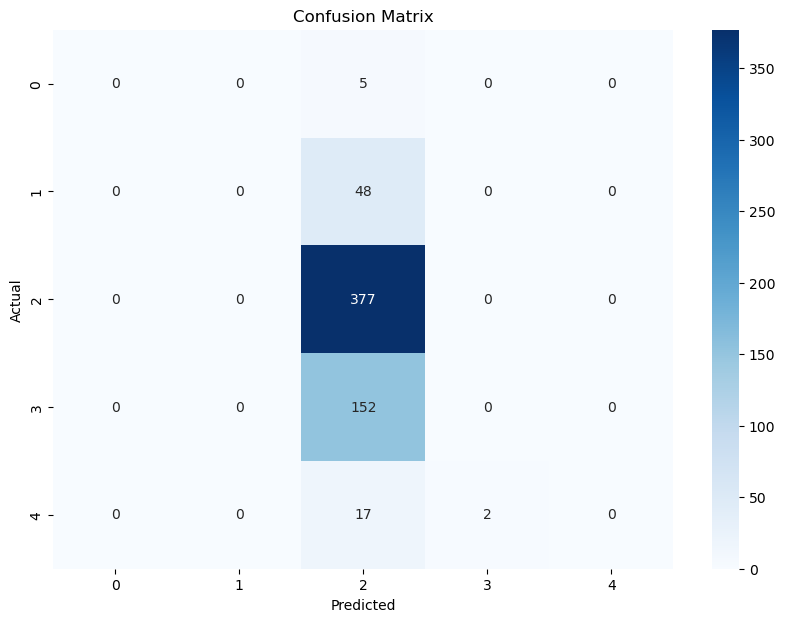

In [141]:
# before preprocess numeric
mlp = MLPClassifier(
    hidden_layer_sizes=(100, ),
    random_state=42,
    learning_rate_init=0.01,
    solver= 'sgd'
).fit(bp_n_X_train, bp_n_y_train)

mlp_y_pred = mlp.predict(bp_n_X_val)
mlp_bp_n_accuracy  = accuracy_score(bp_n_y_val, mlp_y_pred)

class_report = classification_report(bp_n_y_val, mlp_y_pred)
print('Classification Report:')
print(class_report)

conf_matrix = confusion_matrix(bp_n_y_val, mlp_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.74      0.92      0.82       290
           3       0.61      0.53      0.57        96
           4       0.75      0.50      0.60        18

    accuracy                           0.71       459
   macro avg       0.42      0.39      0.40       459
weighted avg       0.62      0.71      0.66       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

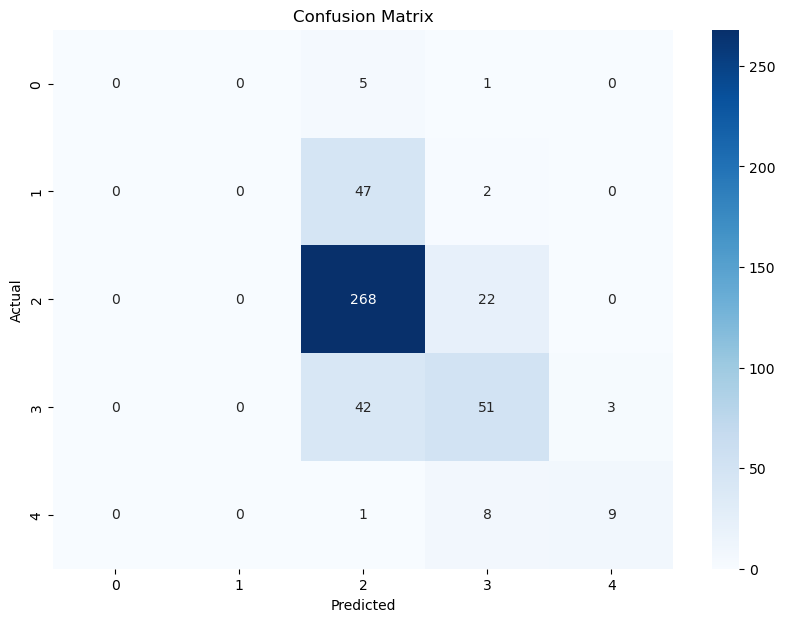

In [143]:
# after preprocess numeric
mlp = MLPClassifier(
    hidden_layer_sizes=(100, ),
    random_state=42,
    learning_rate_init=0.01,
    solver= 'sgd'
).fit(ap_n_X_train, ap_n_y_train)

mlp_y_pred = mlp.predict(ap_n_X_val)
mlp_ap_n_accuracy  = accuracy_score(ap_n_y_val, mlp_y_pred)

class_report = classification_report(ap_n_y_val, mlp_y_pred)
print('Classification Report:')
print(class_report)

conf_matrix = confusion_matrix(ap_n_y_val, mlp_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.02      0.04        49
           2       0.69      0.93      0.79       290
           3       0.49      0.33      0.40        96
           4       0.00      0.00      0.00        18

    accuracy                           0.66       459
   macro avg       0.44      0.26      0.25       459
weighted avg       0.64      0.66      0.59       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

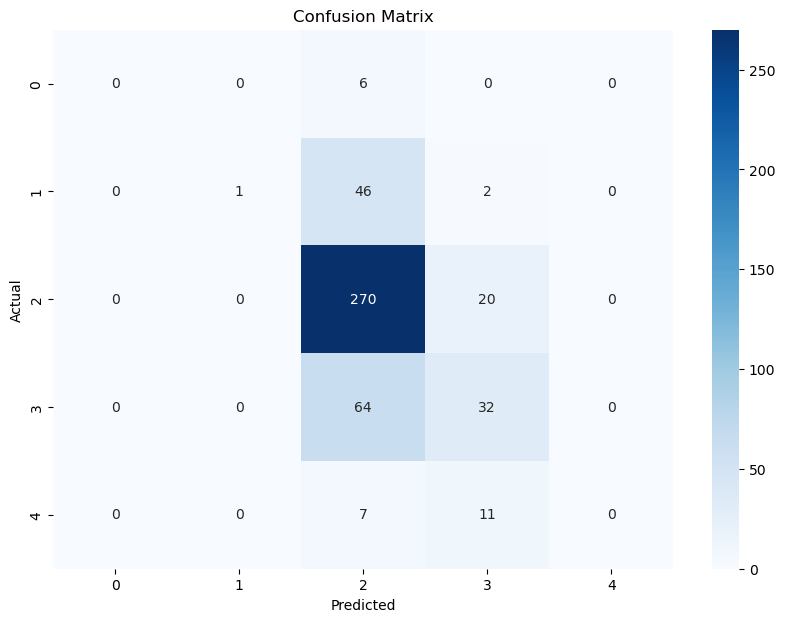

In [144]:
# after preprocess category
ap_c_X_train, ap_c_y_train, ap_c_X_val, ap_c_y_val

mlp = MLPClassifier(
    hidden_layer_sizes=(100, ),
    random_state=42,
    learning_rate_init=0.01,
    solver= 'sgd'
).fit(ap_c_X_train, ap_c_y_train)

mlp_y_pred = mlp.predict(ap_c_X_val)
mlp_ap_c_accuracy  = accuracy_score(ap_c_y_val, mlp_y_pred)

class_report = classification_report(ap_c_y_val, mlp_y_pred)
print('Classification Report:')
print(class_report)

conf_matrix = confusion_matrix(ap_c_y_val, mlp_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [166]:
mlp_data = {
    'Before Preprocess (Numeric)': [mlp_bp_n_accuracy],
    'After Preprocess (Numeric)': [mlp_ap_n_accuracy],
    'After Preprocess (Category)': [mlp_ap_c_accuracy],
    'After Preprocess (Mixed)': [mlp_ap_accuracy]
}

mlp_acc_data = pd.DataFrame(mlp_data, index=["accuracy"])
mlp_acc_data

Before Preprocess (Numeric)  After Preprocess (Numeric)  \
accuracy                     0.627288                    0.714597   

          After Preprocess (Category)  After Preprocess (Mixed)  
accuracy                     0.660131                  0.762527

### 4.6 Logistic Regression

In [174]:
def lr(X_train, y_train, X_val, y_val):
        
    log_reg = LogisticRegression(random_state=42, max_iter=500)
    cv_results = cross_validate(log_reg, X_train, y_train, cv=5, return_train_score=True, scoring='accuracy')
    train_mean = cv_results['train_score'].mean()
    test_mean = cv_results['test_score'].mean()
    print(f'Cross-validated train accuracy: {train_mean:.2f}')
    print(f'Cross-validated test accuracy: {test_mean:.2f}')

    log_reg.fit(X_train, y_train)
    y_val_pred = log_reg.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'validation accuracy: {accuracy:.2f}')

    class_report = classification_report(y_val, y_val_pred)
    print('Classification Report:')
    print(class_report)    
    
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy

In [175]:
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train, y_train)
coefficients = log_reg.coef_[0]
features = X_train.columns
for feature, coef in zip(features, coefficients):
    print(f'Feature: {feature}, Coefficient: {coef}')

Feature: num_voted_users, Coefficient: -1.1861339569627158
Feature: movie_facebook_likes, Coefficient: -0.029191370176532273
Feature: duration, Coefficient: -0.43437429607512257
Feature: director_facebook_likes, Coefficient: 0.37143714914849696
Feature: Drama, Coefficient: -1.710508988370741
Feature: gross, Coefficient: -0.31967414754205054
Feature: Horror, Coefficient: -0.14684025223508404
Feature: Sport, Coefficient: 1.2187993982965397
Feature: title_year, Coefficient: 0.3118545402932984
Feature: language, Coefficient: -0.6314845299053996
Feature: Comedy, Coefficient: 0.0035806486886733207
Feature: content_rating_Unrated, Coefficient: -0.11601437196926753
Feature: Biography, Coefficient: -0.4826723195130291
Feature: History, Coefficient: -0.16557096891062356
Feature: content_rating_X, Coefficient: -0.035356014018708366
Feature: average_degree_centrality, Coefficient: -0.6690369609745218


Cross-validated train accuracy: 0.73
Cross-validated test accuracy: 0.72
validation accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.75      0.94      0.83       290
           3       0.70      0.59      0.64        96
           4       0.90      0.50      0.64        18

    accuracy                           0.74       459
   macro avg       0.47      0.41      0.42       459
weighted avg       0.65      0.74      0.68       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


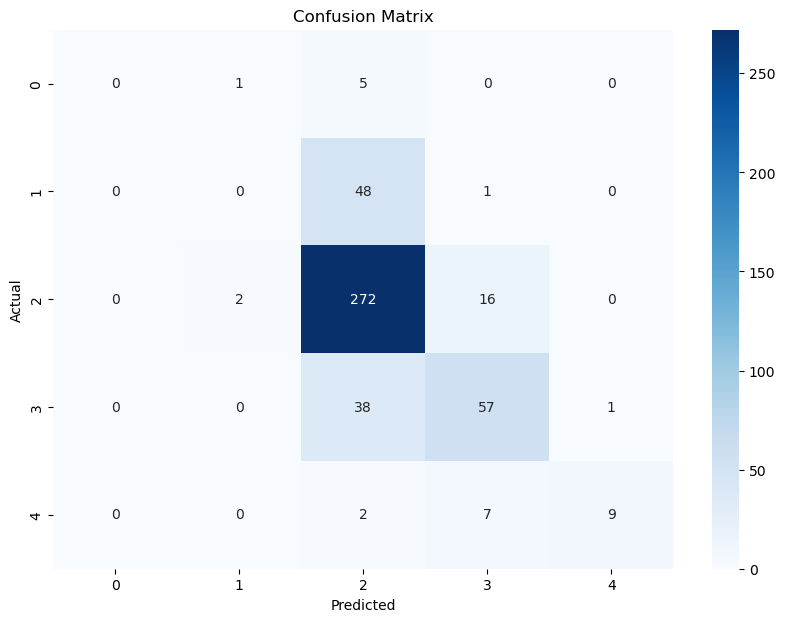

In [176]:
# after preprocess
ap_lr_accuracy = lr(X_train, y_train, X_val, y_val)

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Cross-validated train accuracy: 0.67
Cross-validated test accuracy: 0.67
validation accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.02      0.04        48
           2       0.69      0.92      0.79       377
           3       0.55      0.32      0.40       152
           4       0.64      0.37      0.47        19

    accuracy                           0.67       601
   macro avg       0.57      0.32      0.34       601
weighted avg       0.67      0.67      0.61       601



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-sc

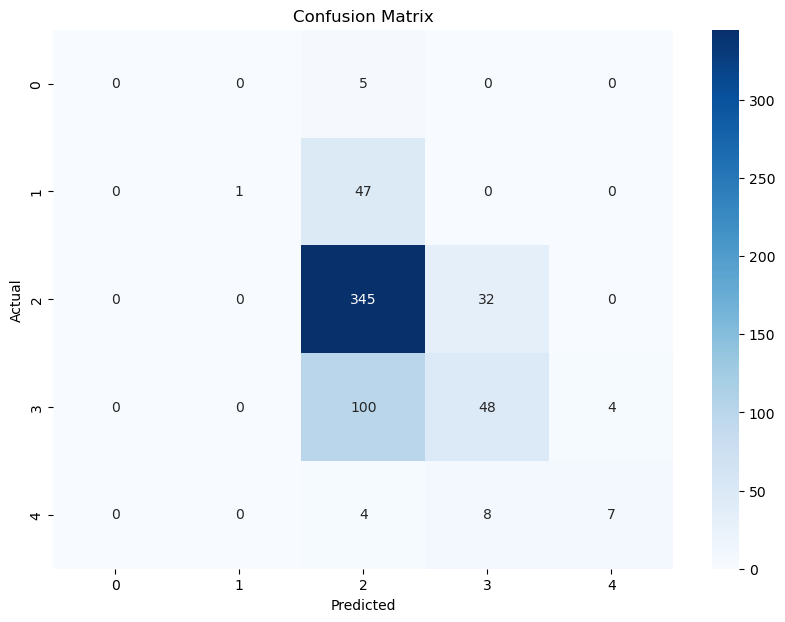

In [120]:
# before preprocess numeric
bp_n_lr_accuracy = lr(bp_n_X_train, bp_n_y_train, bp_n_X_val, bp_n_y_val)

#### discussion area of lr

Cross-validated train accuracy: 0.71
Cross-validated test accuracy: 0.70
validation accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.72      0.94      0.82       290
           3       0.66      0.45      0.53        96
           4       0.73      0.44      0.55        18

    accuracy                           0.71       459
   macro avg       0.42      0.37      0.38       459
weighted avg       0.62      0.71      0.65       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


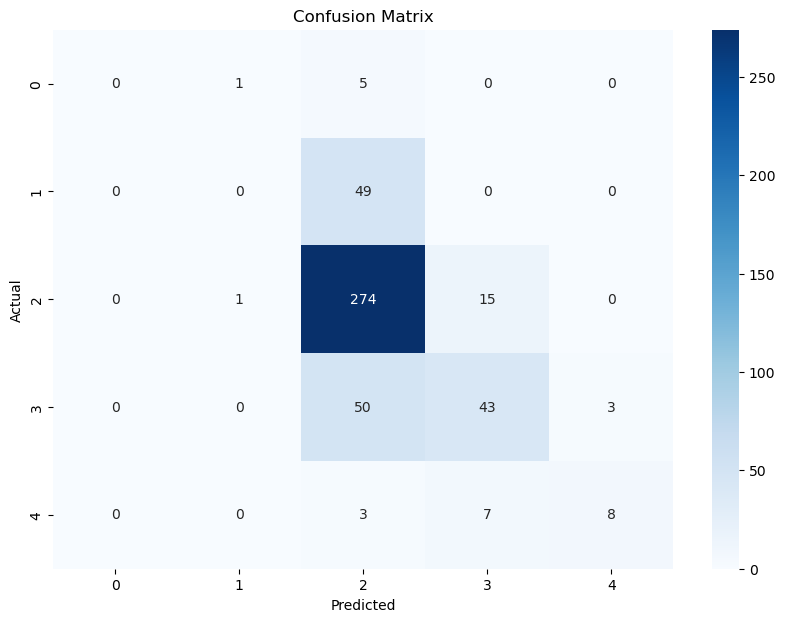

In [121]:
# after preprocess numeric
ap_n_lr_accuracy = lr(ap_n_X_train, ap_n_y_train, ap_n_X_val, ap_n_y_val)

Cross-validated train accuracy: 0.68
Cross-validated test accuracy: 0.67
validation accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.67      0.94      0.78       290
           3       0.47      0.26      0.34        96
           4       0.00      0.00      0.00        18

    accuracy                           0.65       459
   macro avg       0.23      0.24      0.22       459
weighted avg       0.52      0.65      0.57       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


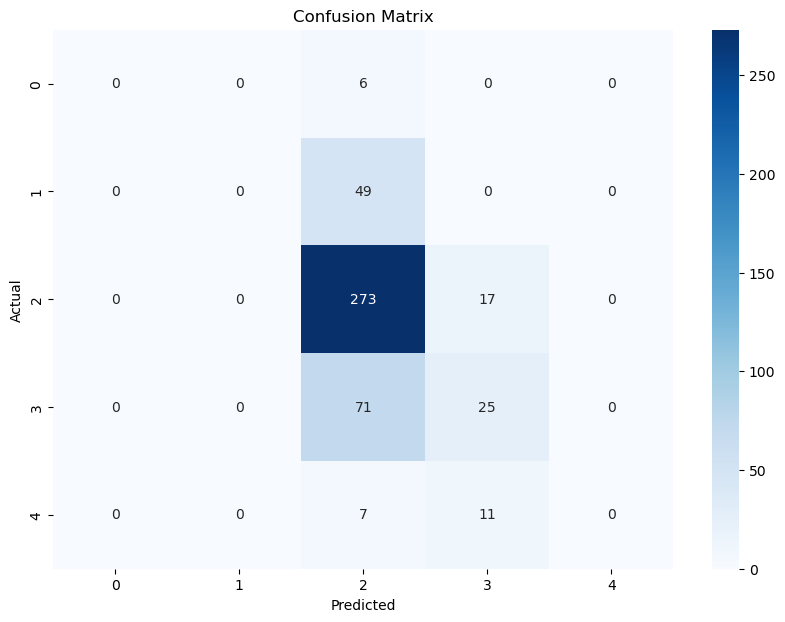

In [122]:
# after preprocess category
ap_c_lr_accuracy = lr(ap_c_X_train, ap_c_y_train, ap_c_X_val, ap_c_y_val)

#### lr result

In [123]:
LR_data = {
    'Before Preprocess (Numeric)': [bp_n_lr_accuracy],
    'After Preprocess (Numeric)': [ap_n_lr_accuracy],
    'After Preprocess (Category)': [ap_c_lr_accuracy],
    'After Preprocess (Mixed)': [ap_lr_accuracy]
}

LR_acc_data = pd.DataFrame(LR_data, index=["accuracy"])
LR_acc_data

Before Preprocess (Numeric)  After Preprocess (Numeric)  \
accuracy                     0.667221                    0.708061   

          After Preprocess (Category)  After Preprocess (Mixed)  
accuracy                     0.649237                  0.736383

In [124]:
# X_test
log_reg_test =  LogisticRegression(max_iter=200, random_state=42)
log_reg_test.fit(X_train, y_train)
log_reg_y_pred = log_reg_test.predict(X_test_3)
log_reg_y_pred = pd.DataFrame(log_reg_y_pred)
log_reg_result = pd.concat([ID, log_reg_y_pred], axis = 1)
log_reg_result.to_csv('output_LR.csv', index=False)

In [139]:
log_reg_result[0].value_counts()

2    569
3    150
4     23
1      9
0      1
Name: 0, dtype: int64

### 4.7 Random Forest

In [164]:
def randomForest(X_train, y_train,  X_val, y_val, depth_range = range(1, 21)):
    results = {'depth': [], 'train_score': [], 'test_score': []}
    for depth in depth_range:
        dt = RandomForestClassifier(max_depth=depth, max_features = 'sqrt',
                                    bootstrap = 'False',
                                     random_state=42, n_estimators = 100)
        cv_results = cross_validate(dt, X_train, y_train, cv=5, return_train_score=True, scoring='accuracy')
        train_mean = cv_results['train_score'].mean()
        test_mean = cv_results['test_score'].mean()
        results['depth'].append(depth)
        results['train_score'].append(train_mean)
        results['test_score'].append(test_mean)
    
    results = pd.DataFrame(results)
    learning_curve(results, 'depth', 'Random Forest')
    max_test_score_row = results.loc[results['test_score'].idxmax()]
    best_depth = max_test_score_row['depth']

    best_dt = RandomForestClassifier(max_depth=depth, max_features = 'sqrt',
                                    bootstrap = 'False',
                                    random_state=42, n_estimators = 100)
    best_dt.fit(X_train, y_train)
    y_val_pred = best_dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation accuracy with best depth={best_depth}: {accuracy}')

    class_report = classification_report(y_val, y_val_pred)
    print('Classification Report:')
    print(class_report)

    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    importances = best_dt.feature_importances_
    feature_names = X_train.columns
    features_importance = zip(feature_names, importances)
    
    sorted_features = sorted(features_importance, key=lambda x: x[1], reverse=True)
    
    features = [x[0] for x in sorted_features]
    importances = [x[1] for x in sorted_features]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances, color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()
    
    
    return best_depth, accuracy

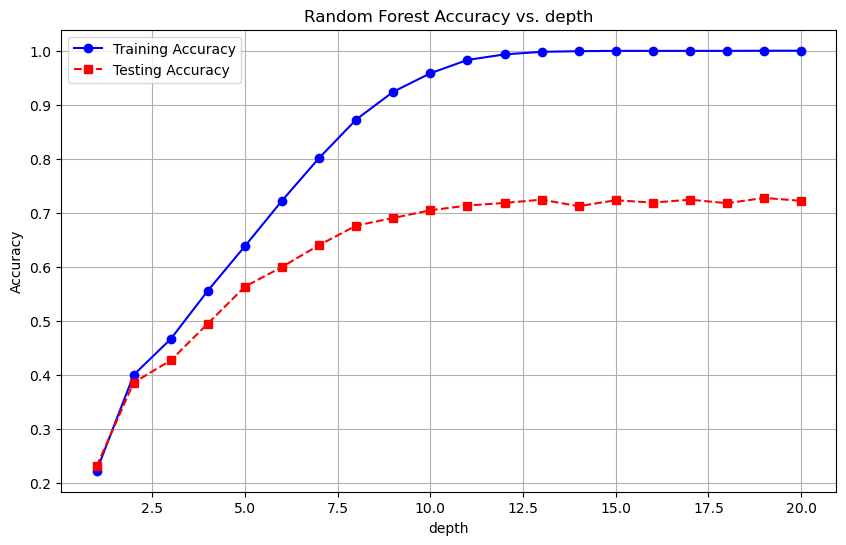

Validation accuracy with best depth=19.0: 0.7407407407407407
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.75      0.12      0.21        49
           2       0.75      0.95      0.84       290
           3       0.68      0.54      0.60        96
           4       0.78      0.39      0.52        18

    accuracy                           0.74       459
   macro avg       0.59      0.40      0.43       459
weighted avg       0.73      0.74      0.70       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


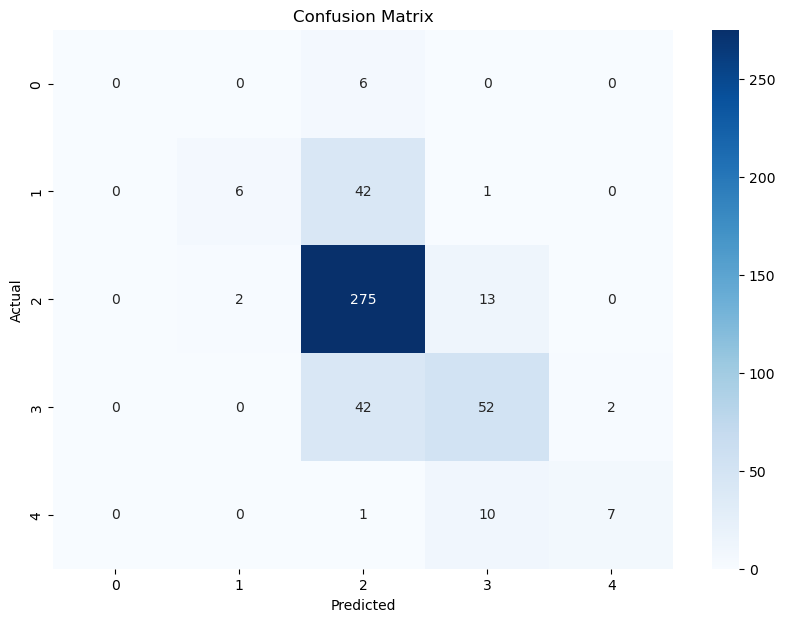

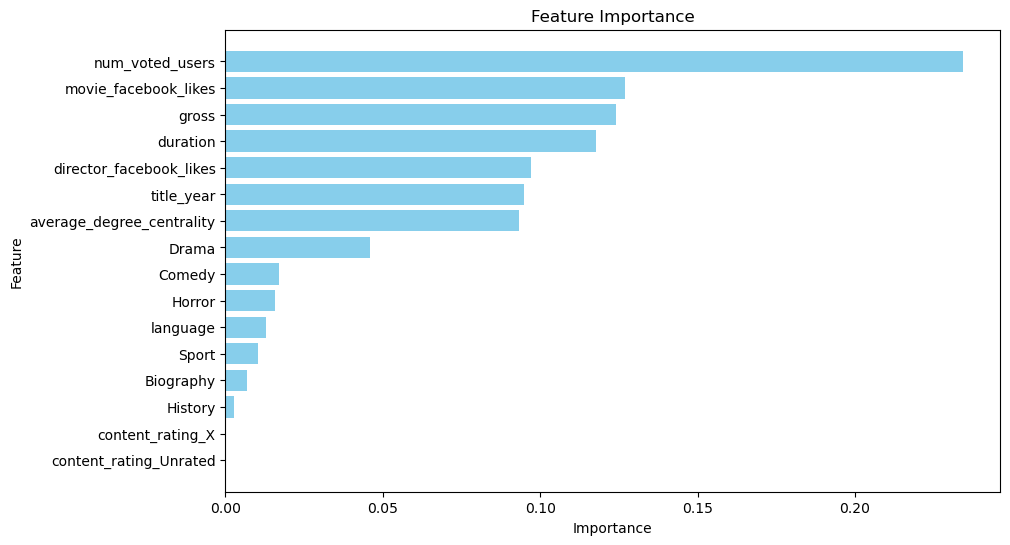

In [155]:
# after preprocess
ap_best_depth, ap_rf_accuracy = randomForest(X_train, y_train, X_val, y_val)

#### discussion

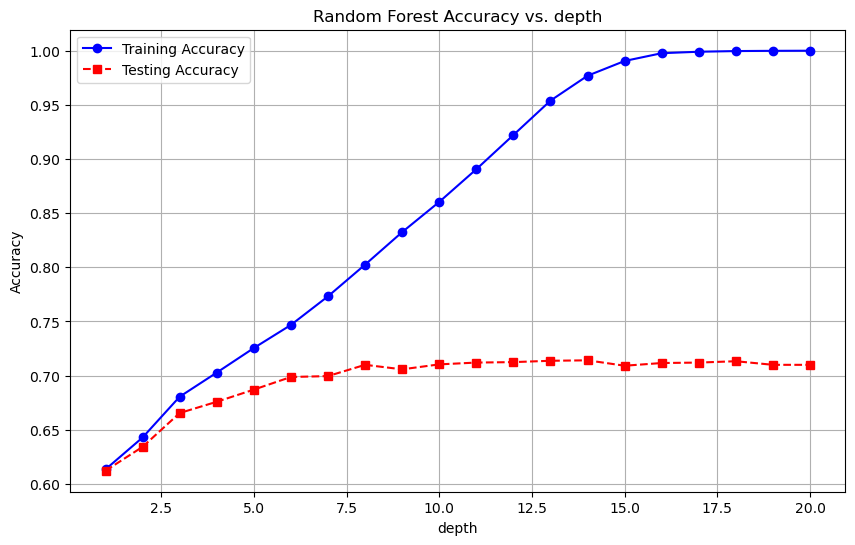

Validation accuracy with best depth=14.0: 0.7054908485856906
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      0.06      0.12        48
           2       0.73      0.90      0.80       377
           3       0.62      0.50      0.55       152
           4       0.70      0.37      0.48        19

    accuracy                           0.71       601
   macro avg       0.56      0.37      0.39       601
weighted avg       0.70      0.71      0.67       601



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


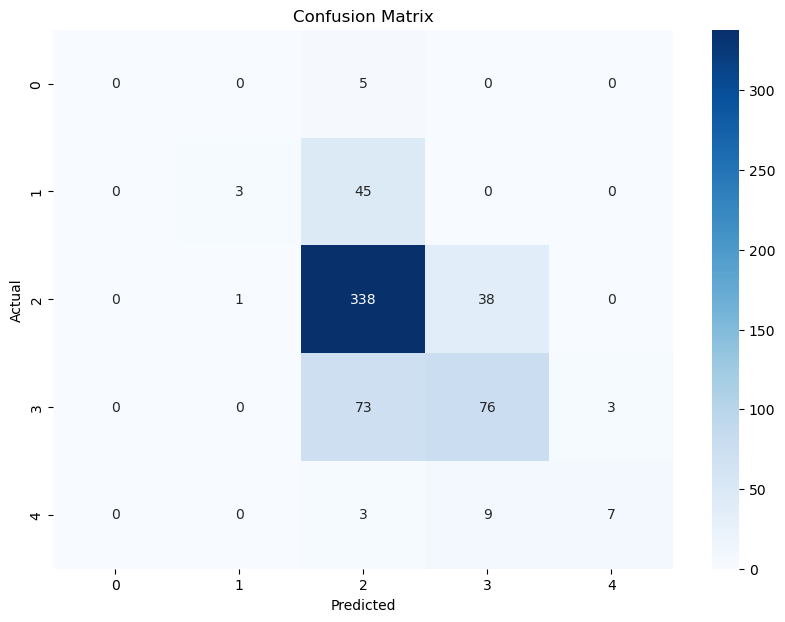

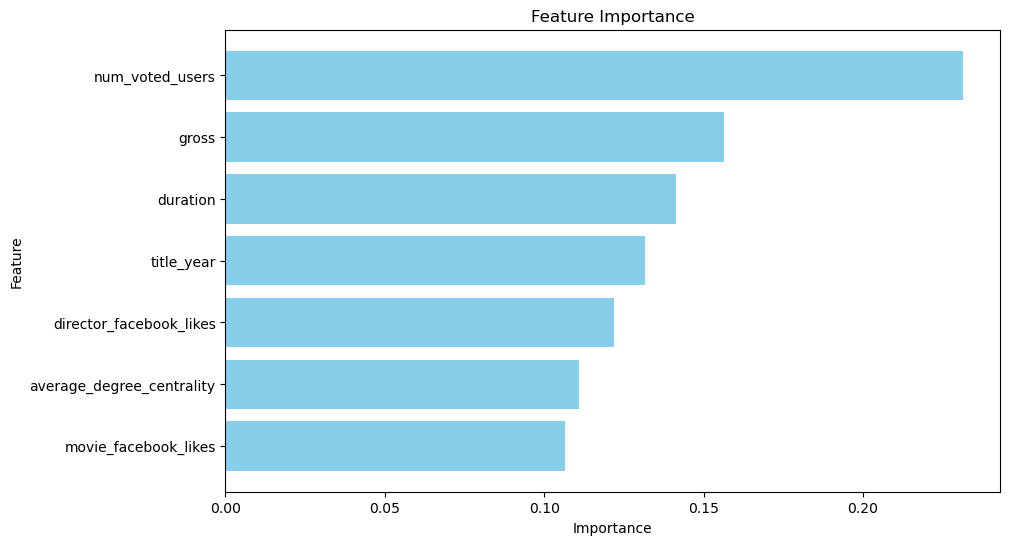

In [148]:
# before preprocess numeric
bp_best_depth, bp_n_rf_accuracy = randomForest(bp_n_X_train, bp_n_y_train, bp_n_X_val, bp_n_y_val)

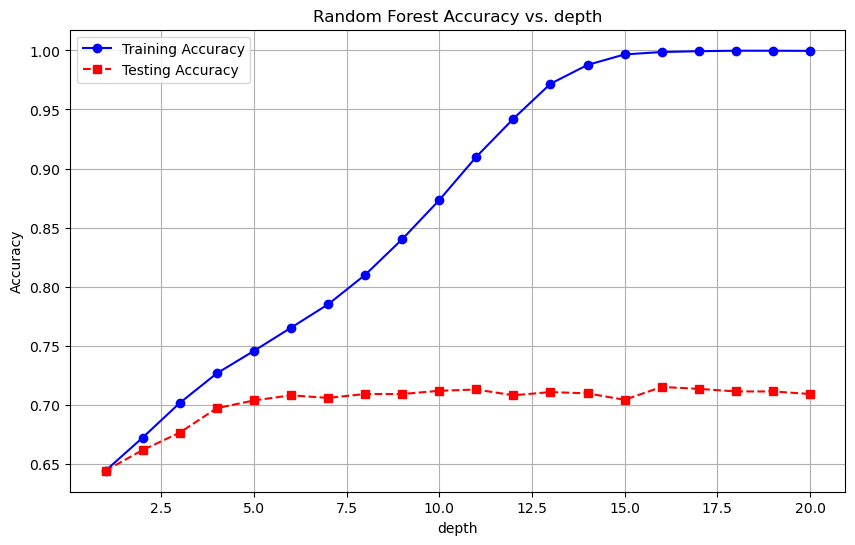

Validation accuracy with best depth=16.0: 0.7320261437908496
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.75      0.06      0.11        49
           2       0.74      0.93      0.83       290
           3       0.65      0.57      0.61        96
           4       1.00      0.44      0.62        18

    accuracy                           0.73       459
   macro avg       0.63      0.40      0.43       459
weighted avg       0.73      0.73      0.69       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


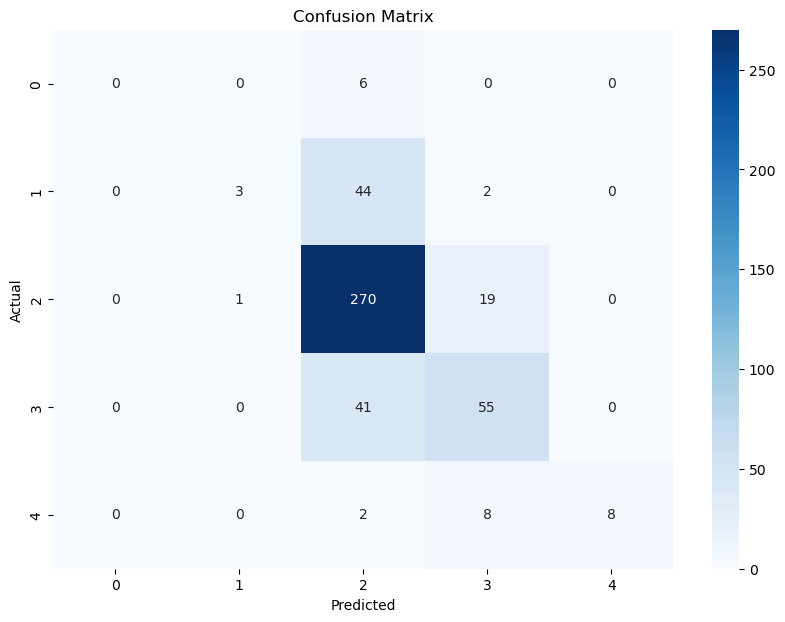

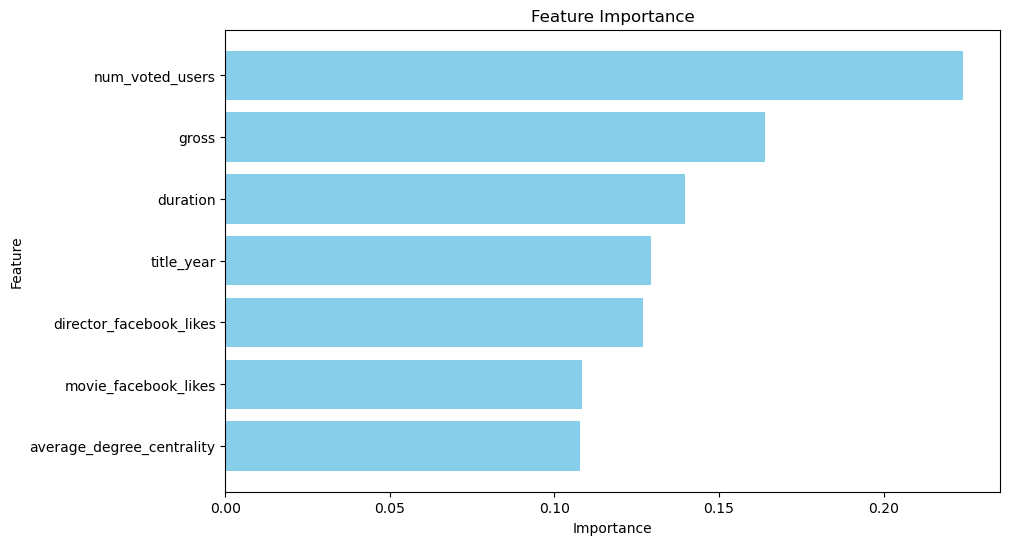

In [149]:
# after preprocess numeric
ap_best_depth, ap_n_rf_accuracy = randomForest(ap_n_X_train, ap_n_y_train, ap_n_X_val, ap_n_y_val)

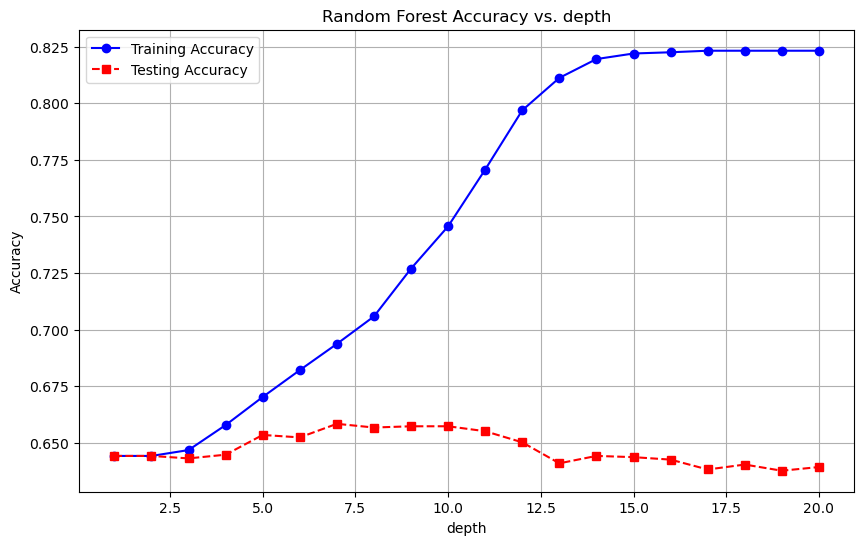

Validation accuracy with best depth=7.0: 0.6100217864923747
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.16      0.06      0.09        49
           2       0.67      0.84      0.75       290
           3       0.44      0.33      0.38        96
           4       0.33      0.06      0.10        18

    accuracy                           0.61       459
   macro avg       0.32      0.26      0.26       459
weighted avg       0.55      0.61      0.56       459



/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


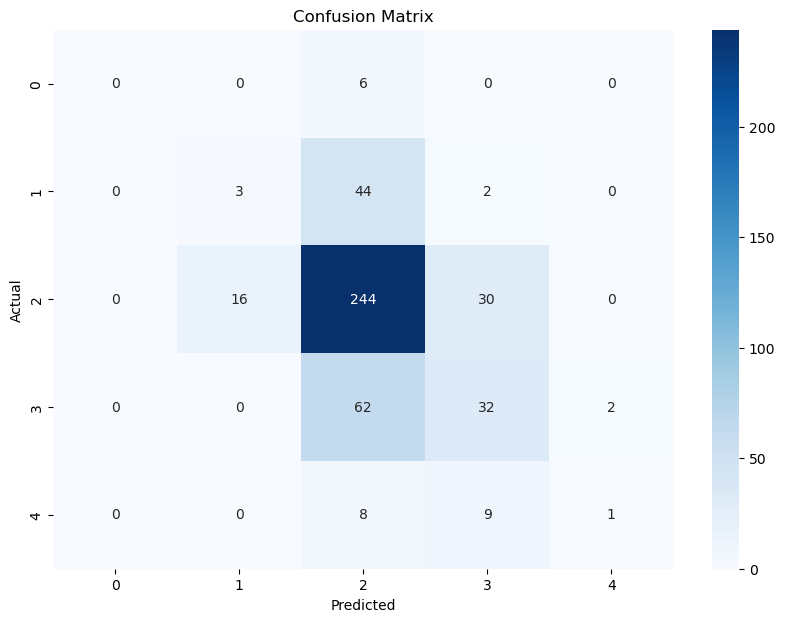

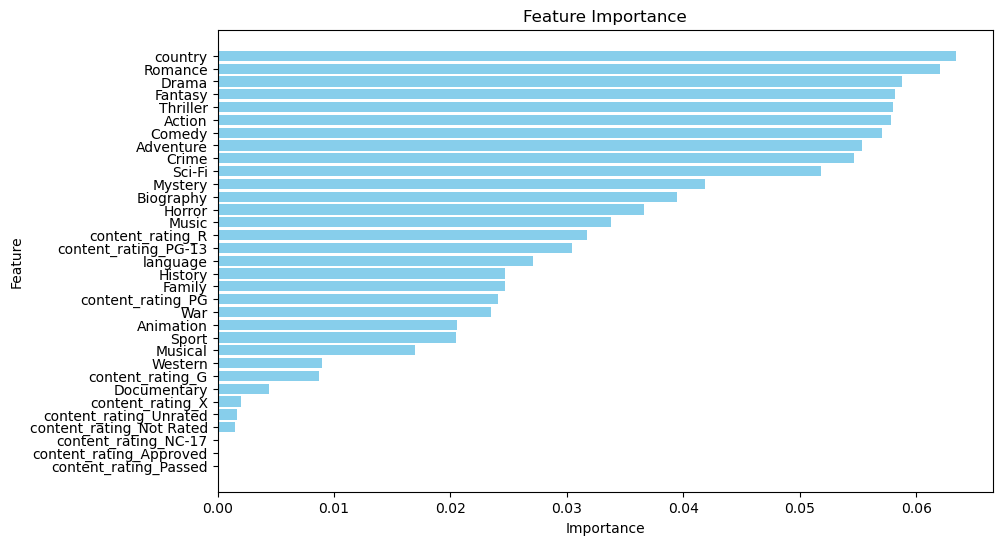

In [150]:
# after preprocess category
ap_c_best_depth, ap_c_rf_accuracy = randomForest(ap_c_X_train, ap_c_y_train, ap_c_X_val, ap_c_y_val)

#### results

In [152]:
KNN_data = {
    'Before Preprocess (Numeric)': [bp_n_rf_accuracy],
    'After Preprocess (Numeric)': [ap_n_rf_accuracy],
    'After Preprocess (Category)': [ap_c_rf_accuracy],
    'After Preprocess (Mixed)': [ap_rf_accuracy]
}

KNN_acc_data = pd.DataFrame(KNN_data, index=["accuracy"])
KNN_acc_data

Before Preprocess (Numeric)  After Preprocess (Numeric)  \
accuracy                     0.705491                    0.732026   

          After Preprocess (Category)  After Preprocess (Mixed)  
accuracy                     0.610022                  0.740741

In [163]:
# X_test
rf_test = RandomForestClassifier(max_depth=ap_best_depth, max_features = 'sqrt',
                                    bootstrap = 'False',
                                    random_state=42, n_estimators = 100)
rf_test.fit(X_train, y_train)
rf_y_pred = rf_test.predict(X_test_3)
rf_y_pred = pd.DataFrame(rf_y_pred)
rf_result = pd.concat([ID, rf_y_pred], axis = 1)
rf_result.to_csv('output_rf.csv', index=False)

### 4.8 Stacking

In [128]:
base_models = [
    ('lr', LogisticRegression(random_state=42, max_iter=500)),
    ('svm', SVC(kernel= "linear", C=ap_kernel_best_c, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors = ap_weighted_best_k,  weights = 'distance')),
    ('mlp',  MLPClassifier(hidden_layer_sizes=(100, ), random_state=42,
                           learning_rate_init=0.001, solver= 'sgd', max_iter=500))
]

In [129]:
meta_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)
stacking_clf.fit(X_train, y_train)
y_val_pred = stacking_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangw

0.7407407407407407

In [130]:
def stacking(X_train, y_train,  X_val, y_val, base_models, depth_range = range(1, 11)):
    results = {'depth': [], 'train_score': [], 'test_score': []}
    for depth in depth_range:
        meta_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
        stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)
        cv_results = cross_validate(stacking_clf, X_train, y_train, cv=5, return_train_score=True, scoring='accuracy')
        train_mean = cv_results['train_score'].mean()
        test_mean = cv_results['test_score'].mean()
        results['depth'].append(depth)
        results['train_score'].append(train_mean)
        results['test_score'].append(test_mean)
    
    results = pd.DataFrame(results)
    learning_curve(results, 'depth', 'Stacking')
    max_test_score_row = results.loc[results['test_score'].idxmax()]
    best_depth = max_test_score_row['depth']

    meta_model = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
    best_dt = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)
    best_dt.fit(X_train, y_train)
    y_val_pred = best_dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation accuracy with best depth={best_depth}: {accuracy}')

    class_report = classification_report(y_val, y_val_pred)
    print('Classification Report:')
    print(class_report)

    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangw

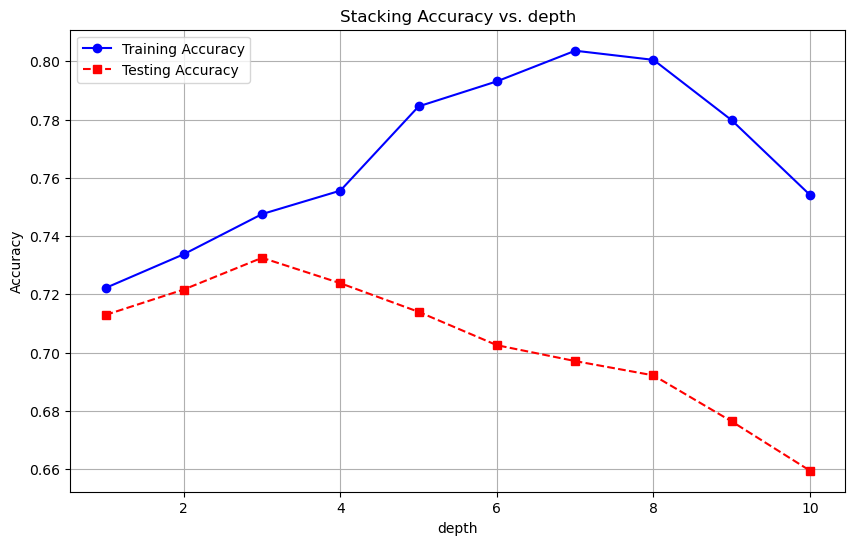

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangw

Validation accuracy with best depth=3.0: 0.7407407407407407
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.76      0.90      0.83       290
           3       0.64      0.72      0.68        96
           4       1.00      0.50      0.67        18

    accuracy                           0.74       459
   macro avg       0.48      0.42      0.43       459
weighted avg       0.66      0.74      0.69       459



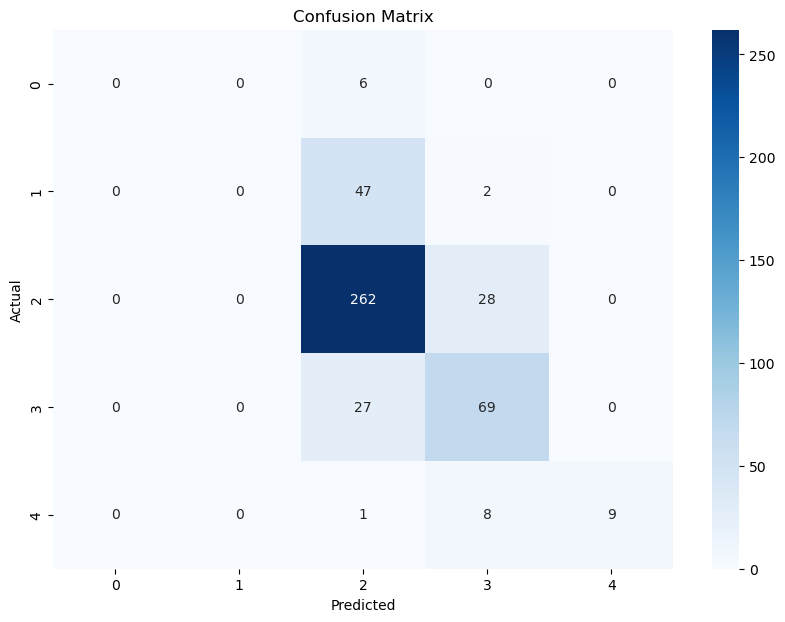

In [131]:
stacking(X_train, y_train,  X_val, y_val, base_models, depth_range = range(1, 11))

In [132]:
# X_test
meta_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
stacking_test = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)
stacking_test.fit(X_train, y_train)
stacking_y_pred = stacking_test.predict(X_test_3)
stacking_y_pred = pd.DataFrame(stacking_y_pred)
stacking_result = pd.concat([ID, stacking_y_pred], axis = 1)
stacking_result.to_csv('output_ST.csv', index=False)

/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wangw